<a href="https://colab.research.google.com/github/vasanthsai26/credit_default_prediction/blob/main/ml_credit_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Credit Default Prediction With Machine Learning</center>


<center>
<img src="https://i1.wp.com/blog.bankbazaar.com/wp-content/uploads/2016/03/Surviving-a-Credit-Card-Default.png?resize=665%2C266&ssl=1" alt="Surviving a credit deafault" width="600" height="400">
</center>

## Problem Analysis



> **Problem Statement**





<p> Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.</p>


<p>Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by <strong>predicting the probability that somebody will experience financial distress in the next two years.</strong></p>

<p>The goal of this competition is to build a model that <strong>borrowers can use to help make the best financial decisions.</strong></p>







> **Key Observations**



- The goal of the project is to build a model for the borrowers to help them understand how they can improve their creditworthiness based on their credit history. Hence, **model explainability** is important, where interpretable model outputs give actionable insights for borrowers.

- This is a **binary classification** problem where the two classes define whether the borrower will default in the next two years.

- The model should be built from the perspective of banks, so **False negatives are more costly than False positives**, as they lose more money. To achieve this, we should give more importance to **recall** than **precision**.

## Evaluation Metric



> The Submissions for this Kaggle competition are evaluated on AUC.



**What is AUC?**

<p>AUC stands for Area Under the ROC Curve. That is, AUC measures the entire two-dimensional area underneath the entire ROC curve.</p> 

**What is ROC curve?** 
<p>An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: </p>

* True Positive Rate
* False Positive Rate

<p><strong>True Positive Rate (TPR)</strong> is a synonym for <strong>recall</strong> or <strong>sensitivity</strong> and it can be interpreted as from all the positive classes, how many of them our model predicted correctly.</p>

$$\text {True Positive Rate (TPR)}=\text {Sensitvity} = \frac{\text{TP}} {\text{TP + FN}}$$ 


$$\text {TP}:\text {No of True Positives} $$

$$\text {FN}:\text {No of False Negatives } $$



<p><strong>False Positive Rate (FPR)</strong> is defined as follows:</p> 

$$\text {False Positive Rate (fpr)} =\text{1- Specificity} = \frac{FP}{FP+TN}$$

$$\text {FP}:\text {No of False Positives} $$

$$\text {TN}:\text {No of True Negatives } $$ 

- The below confustion matrix diagram helps to understand this concepts better.

![](https://i.imgur.com/nHHmhxt.png)


<p>An <strong>ROC curve </strong>plots <strong>TPR</strong> vs. <strong>FPR</strong> at different classification thresholds.</p>
<p>Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.<p> 

<center>
<img src="https://developers.google.com/static/machine-learning/crash-course/images/ROCCurve.svg" alt="Roc curve" width="500" height="400"></center>



<p> The <strong>AUC </strong>is the area under the above the ROC curve which measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1) which is shown below<p>   

<center>
<img src="https://developers.google.com/static/machine-learning/crash-course/images/AUC.svg" alt="Roc curve" width="500" height="400"></center>


- AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. 


[source](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)





## Data Gathering and Initial Insights

### Installing and Importing the required packages.



> PIP is the standard package mangement system in Python, below are the packages we need to install for this project.



In [ ]:
!pip install jovian numpy pandas matplotlib==3.1.1 plotly seaborn opendatasets scikit-learn xlrd pyarrow imbalanced-learn --upgrade --quiet

     |████████████████████████████████| 13.1 MB 4.9 MB/s 
     |████████████████████████████████| 15.2 MB 38.7 MB/s 
     |████████████████████████████████| 285 kB 47.3 MB/s 
     |████████████████████████████████| 96 kB 5.3 MB/s 
     |████████████████████████████████| 35.3 MB 216 kB/s 
     |████████████████████████████████| 199 kB 54.2 MB/s 
     |████████████████████████████████| 199 kB 48.5 MB/s 


In [ ]:
## Version Tracking packages
import jovian

## Data Analysis packages
import numpy as np
import pandas as pd

## Data Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
import missingno as msno

## General Tools
import opendatasets as od
import os
import re
import joblib
import json
import warnings

In [ ]:
### sklearn preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer,FunctionTransformer,OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE


## Machine learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression,SGDClassifier
from xgboost import XGBClassifier

In [ ]:
### Initial settings
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000'  

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

### Downloading and Loading the Dataset

- The dataset is from <strong>Kaggle</strong>. it provides cutting-edge data science, faster and better than most people ever thought possible. Kaggle offers both public and private data science competitions and on-demand consulting by an elite global talent pool.

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/GiveMeSomeCredit'

- <strong>Opendatasets</strong> is a python library developed by Jovian for downloading datasets from online sources like Kaggle and Google Drive

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kallurivasanthsai
Your Kaggle Key: ··········


100%|██████████| 5.16M/5.16M [00:00<00:00, 53.8MB/s]


Extracting archive ./GiveMeSomeCredit/GiveMeSomeCredit.zip to ./GiveMeSomeCredit


In [ ]:
os.listdir('GiveMeSomeCredit')

['Data Dictionary.xls', 'cs-test.csv', 'cs-training.csv', 'sampleEntry.csv']

#### Data Description

In [ ]:
data_dictionary = pd.read_excel("/content/GiveMeSomeCredit/Data Dictionary.xlsx")
data_dictionary

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days past due but no worse in the last 2 years.,integer


##### Train Dataset

In [ ]:
### loading train dataset
train_df = pd.read_csv("/content/GiveMeSomeCredit/cs-training.csv")
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
## Initial statistical description
train_df.describe() 

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


- From this we can conclude that "Unnamed: 0" column is ID of that observation.we can drop this.

In [ ]:
## droping the Unnamed column
train_df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
## Shape of the train dataset
train_df.shape

(150000, 11)

In [ ]:
## General information abot the features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

- The MonthlyIncome and NumberofDependents have null values, Let's visulize this to see any patterns in the missing values

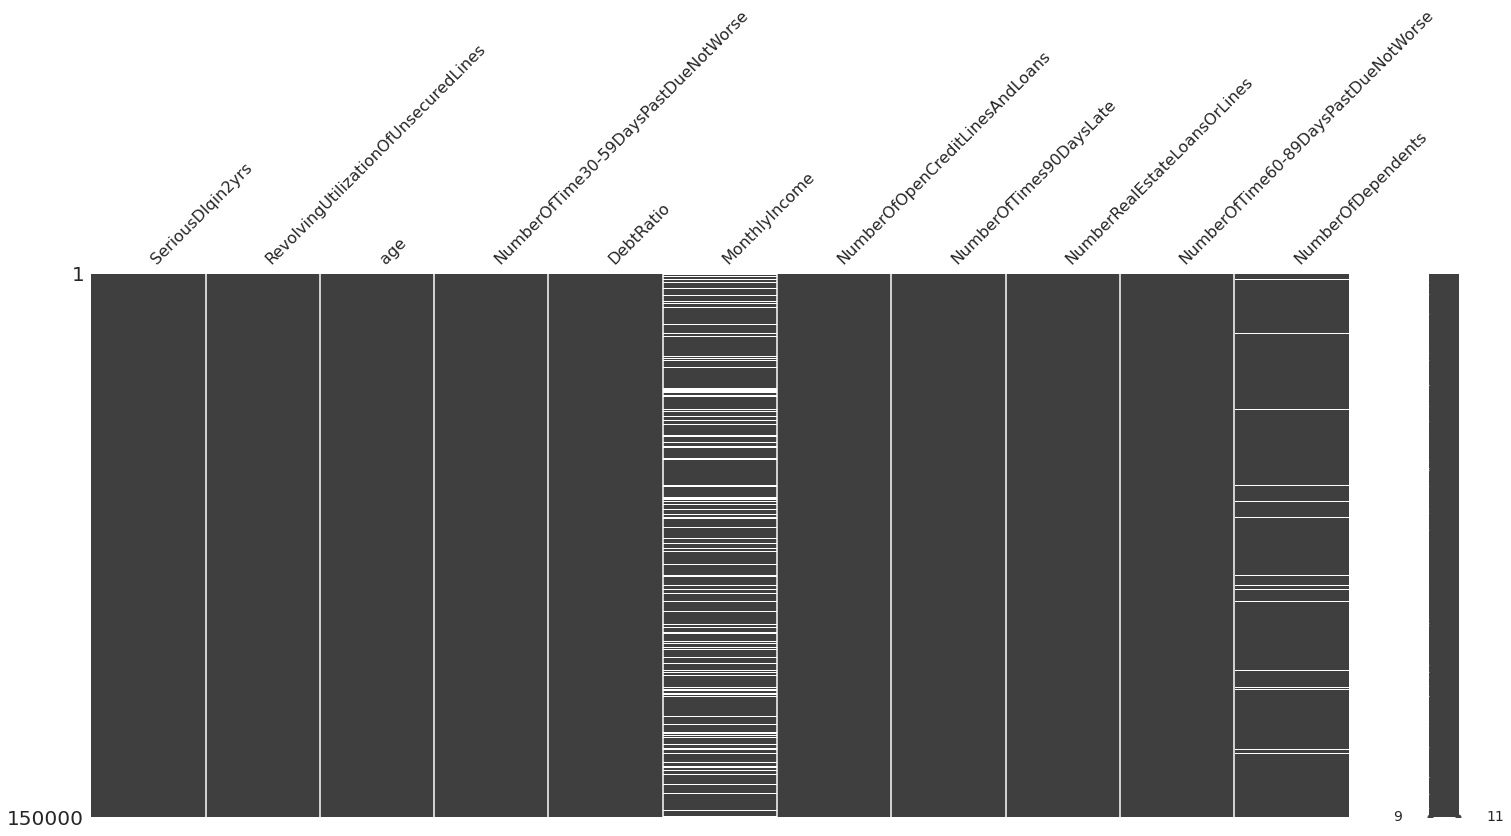

In [ ]:
##Visualize missing values (NaN) values using Missingno Library
msno.matrix(train_df);

- There are 150,000 rows for 11 features in our data.
- We see in the training data, that all the datatypes belong to a numeric class i.e. int and float.
- Columns MonthlyIncome and NumberOfDependents have some null values.

In [ ]:
## Percentage of Null values
null_df = train_df.isnull().sum().sort_values(ascending=False).to_frame()
null_df.columns= ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(train_df)*100,2)
null_df[null_df["No of Null values"] > 0]

,No of Null values,% of Null values
MonthlyIncome,29731,19.82
NumberOfDependents,3924,2.62


In [ ]:
round(train_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.07,0.25,0.0,0.00,0.00,0.00,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.05,249.76,0.0,0.03,0.15,0.56,50708.0
age,150000.0,52.30,14.77,0.0,41.00,52.00,63.00,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.42,4.19,0.0,0.00,0.00,0.00,98.0
DebtRatio,150000.0,353.01,2037.82,0.0,0.18,0.37,0.87,329664.0
MonthlyIncome,120269.0,6670.22,14384.67,0.0,3400.00,5400.00,8249.00,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.45,5.15,0.0,5.00,8.00,11.00,58.0
NumberOfTimes90DaysLate,150000.0,0.27,4.17,0.0,0.00,0.00,0.00,98.0
NumberRealEstateLoansOrLines,150000.0,1.02,1.13,0.0,0.00,1.00,2.00,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.24,4.16,0.0,0.00,0.00,0.00,98.0


- There are outliers in most of the columns, we will Deal with them.

In [ ]:
### Checkin for the duplicate values in the dataset
train_df.duplicated().sum()

609

In [ ]:
train_df[train_df.duplicated()].sort_values(by="age").head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
40715,0,1.0,21,98,0.0,NaN,0,98,0,98,0.0
137102,0,0.0,21,0,0.0,0.0,1,0,0,0,0.0
107622,0,1.0,21,0,0.0,0.0,1,0,0,0,0.0
139345,0,0.0,21,0,0.0,820.0,2,0,0,0,0.0
105971,0,1.0,21,0,0.0,820.0,1,0,0,0,0.0


In [ ]:
### Dropping the duplicate values
train_df.drop_duplicates(inplace=True)
train_df.shape

(149391, 11)

- **Dependent Variable**



> The **SeriousDlqin2yrs** (Person experienced 90 days past due delinquency or worse) is our Target Varible.



In [ ]:
train_df["SeriousDlqin2yrs"].value_counts()

0    139382
1     10009
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
round(train_df["SeriousDlqin2yrs"].value_counts()[1]/(train_df["SeriousDlqin2yrs"].value_counts()[0]+train_df["SeriousDlqin2yrs"].value_counts()[1])*100,2)

6.7

- This problem is a binary classification problem of classes 0 or 1 denoting if cusomter will default in 2 years, The class 1 has only 6.7% total values. Hence, this is an imbalanced learning problem. we will use some resampling techniques to tackle this.

- **Independent Variables or Features**

In [ ]:
train_df.columns[1:]

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

Features can be classified into below categories:

- Historical late repayments in the last 2 years with 3 window periods(**NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWors,  NumberOfTimes90DaysLate**)
- Financial Obligations (**NumberOfOpenCreditLinesAndLoans, NumberOfDependents, DebtRatio, RevolvingUtilizationOfUnsecuredLines**)
- Financial Capabilities (**MonthlyIncome**)
- Demographics (**Age**)

##### Test Dataset

In [ ]:
## Loading the test dataset
test_df = pd.read_csv("/content/GiveMeSomeCredit/cs-test.csv")
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


- We will drop the "**Unnamed: 0**" column and our Target Variable "**SeriousDlqin2yrs**"

In [ ]:
## we will drop the "Unnamed: 0" column and the target column "SeriousDlqin2yrs"]
test_df.drop(["Unnamed: 0","SeriousDlqin2yrs"],axis=1,inplace=True)

In [ ]:
## Shape of the test dataset
test_df.shape

(101503, 10)

In [ ]:
## General information about the features in test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 1   age                                   101503 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 3   DebtRatio                             101503 non-null  float64
 4   MonthlyIncome                         81400 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 6   NumberOfTimes90DaysLate               101503 non-null  int64  
 7   NumberRealEstateLoansOrLines          101503 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 9   NumberOfDependents                    98877 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 7.7 MB


In [ ]:
round(test_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,101503.0,5.31,196.16,0.0,0.03,0.15,0.56,21821.0
age,101503.0,52.41,14.78,21.0,41.00,52.00,63.00,104.0
NumberOfTime30-59DaysPastDueNotWorse,101503.0,0.45,4.54,0.0,0.00,0.00,0.00,98.0
DebtRatio,101503.0,344.48,1632.60,0.0,0.17,0.36,0.85,268326.0
MonthlyIncome,81400.0,6855.04,36508.60,0.0,3408.00,5400.00,8200.00,7727000.0
NumberOfOpenCreditLinesAndLoans,101503.0,8.45,5.14,0.0,5.00,8.00,11.00,85.0
NumberOfTimes90DaysLate,101503.0,0.30,4.52,0.0,0.00,0.00,0.00,98.0
NumberRealEstateLoansOrLines,101503.0,1.01,1.11,0.0,0.00,1.00,2.00,37.0
NumberOfTime60-89DaysPastDueNotWorse,101503.0,0.27,4.50,0.0,0.00,0.00,0.00,98.0
NumberOfDependents,98877.0,0.77,1.14,0.0,0.00,0.00,1.00,43.0


- The total rows for our 11 features are 101,503.
- Similar the Training Data (as it should be), we observe numeric class's datatypes i.e. int and float.
- Nulls were observed for features MonthlyIncome and NumberOfDependents just like the training data.

### Helper Functions

- Helper functions add Structure and reduce Repeatability in our code.We will define multiple Helper functions to ease our modelling. 

In [ ]:
### we will Track the scores
scores = {
    "Model" : list(),
    "Type" : list(),
    "ROCAUC" : list(),
    "Accuracy" : list(),
    "Precision": list(), 
    "Recall" :  list(),
    "F1_Score":list(),
}

In [ ]:
def score_dataset(X, 
                  y, 
                  fold_scores=False,
                  model = lgb.LGBMClassifier(random_state=42) 
                  #model = LogisticRegression(solver='liblinear',random_state=42)
                  ):
    """
    To Check the performance of the given Dataset using a baseline model LogisticRegression or LGBMClassifier with StratifiedKFold.

    """
    
    model_name = str(type(model)).split(".")[-1][0:-2]
    print(f"\t\t{model_name.upper()} MODEL\n")
    
    folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = np.zeros(len(X))

    for fold, (train_idx, val_idx) in enumerate(folds.split(X.values, y.values)):
        
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[val_idx]
        y_val = y.iloc[val_idx]

        clf = model.fit(X_train, y_train.to_numpy().reshape(-1))        
        y_pred[val_idx] = clf.predict_proba(X_val)[:, 1]
        
        if fold_scores:
            print('Fold {} ROC AUC score: {:.8f}'.format(fold,roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])))

    print("CV score: {:.8f}".format(roc_auc_score(y, y_pred)))
    return

In [ ]:
def plot_roc_curve(y_true,y_prob_preds,ax):
    """
    To plot the ROC curve for the given predictions and model

    """ 
    fpr,tpr,threshold = roc_curve(y_true,y_prob_preds)
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate");
    plt.show();

In [ ]:
def plot_confustion_matrix(y_true,y_preds,axes,name=''):
    """
    To plot the Confusion Matrix for the given predictions

    """     
    cm = confusion_matrix(y_true, y_preds)
    group_names = ['TN','FP','FN','TP']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=axes)
    axes.set_ylim([2,0])
    axes.set_xlabel('Prediction')
    axes.set_ylabel('Actual')
    axes.set_title(f'{name} Confusion Matrix');

In [ ]:
def classification_report_df(report):
    """
    To Extract the information from the classification report generated from the sklearn classification_report function.

    """ 
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = re.split(' +', line.strip())
        if row_data[0].strip() not in ("","accuracy"):
            row['class'] = row_data[0]
            row['Precision'] = float(row_data[1])
            row['Recall'] = float(row_data[2])
            row['F1_score'] = float(row_data[3])
            row['Observations'] = float(row_data[4])
            report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.set_index("class",inplace=True)
    #dataframe.to_csv('classification_report.csv', index = False)
    return dataframe

In [ ]:
def make_classification_report(model,inputs,targets,model_name=None,record=False):
    """
     To Generate the classification report with all the metrics of a given model with confusion matrix as well as ROC AUC curve.

    """
    ### Getting the model name from model object
    if model_name is None: 
        model_name = str(type(model)).split(".")[-1][0:-2]


    ### Making the predictions for the given model
    preds = model.predict(inputs)
    if model_name in ["LinearSVC"]:
        prob_preds = model.decision_function(inputs)
    else:
        prob_preds = model.predict_proba(inputs)[:,1]


    ### Starting the report by printing the name of the Model
    print(f"\t\t{model_name.upper()} MODEL\n")

    ### printing the ROC AUC score
    auc_score = roc_auc_score(targets,prob_preds)
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))
    
    ### printing the stats of the model
    stats = stats_from_cf(confusion_matrix(targets, preds))
    print(stats.fillna(0).to_markdown(index=False))
    print("\n")

    ### printing the stats of the model by classes
    print(classification_report_df(classification_report(targets, preds)).to_markdown())
    print("\n")

    ### Plotting the Confusion Matrix and ROC AUC Curve
    fig, axes = plt.subplots(1, 2, figsize=(18,6))
    plot_confustion_matrix(targets,preds,axes[0],model_name)
    plot_roc_curve(targets,prob_preds,axes[1])

    ### Recording the stats of the model
    if record:
        scores["Model"].append(model_name)
        scores["Type"].append("Validation Set")
        scores["ROCAUC"].append(auc_score * 100.0)
        scores["Accuracy"].append(float(stats["Accuracy"]))
        scores["Precision" ].append(float(stats["Precision"]))
        scores["Recall"].append(float(stats["Recall"]))
        scores["F1_Score"].append(float(stats["F1_Score"]))
    return   

In [ ]:
def stats_from_cf(cf):
    """
       To Generate the statistics of the model using the confusion matrix
    """

    stats_dict = {}
    #Accuracy is sum of diagonal divided by total observations
    accuracy  = np.trace(cf) / float(np.sum(cf))

    #if it is a binary confusion matrix, show some more stats
    try:
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_dict = {
                "Accuracy" : ["{:0.3f}".format(accuracy*100)],
                "Precision": ["{:0.3f}".format(precision*100)], 
                "Recall" :  ["{:0.3f}".format(recall*100)],
                "F1_Score": ["{:0.3f}".format(f1_score*100)],  
            }
        else:
            stats_dict =  {
                "Accuracy" : ["{:0.3f}".format(accuracy*100)]
            }
    except ZeroDivisionError:
        stats_dict =  {
                "Accuracy" : ["{:0.3f}".format(accuracy*100)]
            }
    stats_df = pd.DataFrame(stats_dict)
    return stats_df


In [ ]:
def score_model(model,inputs,targets,model_name=None,record=False):
    """
    To Check the performance of the given Model using StratifiedKFold.

    """
    ### Getting the model name from model object and printing it
    if model_name is None: 
        model_name = str(type(model)).split(".")[-1][0:-2]
    print(f"\t\t{model_name.upper()} MODEL\n")

    ### Creating Folds and making predictions
    folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_fold = np.zeros(len(inputs))

    for fold, (train_idx, val_idx) in enumerate(folds.split(inputs.values, targets.values)):
        
        X_train = inputs.iloc[train_idx]
        y_train = targets.iloc[train_idx]
        X_val = inputs.iloc[val_idx]
        y_val = targets.iloc[val_idx]

        clf = model.fit(X_train, y_train.to_numpy().reshape(-1))
        if model_name in ["LinearSVC"]:
            y_fold[val_idx] = y_current_fold = clf.decision_function(X_val)
        else:
            y_fold[val_idx] = y_current_fold = clf.predict_proba(X_val)[:, 1]
        print('Fold {} ROC AUC score: {:.8f}'.format(fold,roc_auc_score(y_val, y_current_fold)))

    ### Training the model with entire input dataset
    trained_model =  model.fit(inputs,targets)

    ### Making predictions on the trained model
    preds = trained_model.predict(inputs)
    if model_name in ["LinearSVC"]:
        prob_preds = trained_model.decision_function(inputs)
    else:
        prob_preds = trained_model.predict_proba(inputs)[:,1]
    
    ### Printing the metrics of the model
    auc_score = roc_auc_score(targets,prob_preds)
    print("\n\t\tTraining Scores\n")
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))
    stats = stats_from_cf(confusion_matrix(targets, preds))
    print(stats.fillna(0).to_markdown(index=False))
    
    ### Recording the stats of the model
    if record:
        scores["Model"].append(model_name)
        scores["Type"].append("Training Set")
        scores["ROCAUC"].append(auc_score * 100.0)
        scores["Accuracy"].append(float(stats["Accuracy"]))
        scores["Precision" ].append(float(stats["Precision"]))
        scores["Recall"].append(float(stats["Recall"]))
        scores["F1_Score"].append(float(stats["F1_Score"])) 

    return trained_model

In [ ]:
### Helper Functions for testing Hyperparamters
def test_params(estimator,**params):
    """
    Train and predict the observations on the given model with given input parameters
    """
    model = estimator(**params).fit(X_train,y_train)
    model_name = str(type(model)).split(".")[-1][0:-2]
    if model_name in ["LinearSVC"]:
        train_preds = model.decision_function(X_train)
        val_preds = model.decision_function(X_val)
    else:
        train_preds = model.predict_proba(X_train)[:,1]
        val_preds = model.predict_proba(X_val)[:,1]
    train_auc_score = roc_auc_score(y_train,train_preds)
    val_auc_score = roc_auc_score(y_val,val_preds)

    return model_name,train_auc_score, val_auc_score

def test_param_and_plot(estimator,param_name, param_values,**initial_params):
    """
    Train,predict and plot Overfitting Curve for the observations on the given model with given input parameters

    """
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        params.update(initial_params)
        model_name,train_auc, val_auc = test_params(estimator,**params)
        train_errors.append(train_auc)
        val_errors.append(val_auc)
    plt.figure(figsize=(10,6))
    plt.title(f'{model_name} Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylim([0.925,0.825])
    plt.ylabel('ROC AUC')
    plt.legend(['Training', 'Validation'])

In [ ]:
def make_submission_file(model,file_name):
    submission_df = pd.read_csv("/content/GiveMeSomeCredit/sampleEntry.csv",index_col=["Id"])
    y_test_preds = model.predict_proba(X_test)
    submission_df["Probability"] = y_test_preds[:,1]
    submission_df.to_csv(f"{file_name}.csv")
    return f"{file_name}.csv is created."

## Data Exploration

In this EDA we will analyze the importance of each feature with Target Variable (SeriousDlqin2yrs), to further improve the features that are used in the models.



### SeriousDlqin2yrs

The <strong>SeriousDlqin2yrs</strong> (Person experienced 90 days past due delinquency or worse. This is our Target Variable and we need to estimate the probability of Delinquency.

<p><strong>What Is a Default?</strong></p>
<p>Default is the failure to make required interest or principal repayments on a debt, whether that debt is a loan or a security. Individuals, businesses, and even countries can default on their debt obligations. Default risk is an important consideration for creditors.</p> 

<p><strong>What Does Delinquent Mean?</strong></p>

<p>The term delinquent refers to the state of being in arrears. When someone is delinquent, they are past due on their financial obligation(s), such as a loan, credit card, or bond payments. This means a borrower's payments are not made to satisfy their debt(s) in a timely manner. Delinquent entities can be either individuals or corporations. Financial delinquency often leads to default if the arrears aren't brought up to date.</p>

In [ ]:
train_df["SeriousDlqin2yrs"].value_counts()

0    139382
1     10009
Name: SeriousDlqin2yrs, dtype: int64

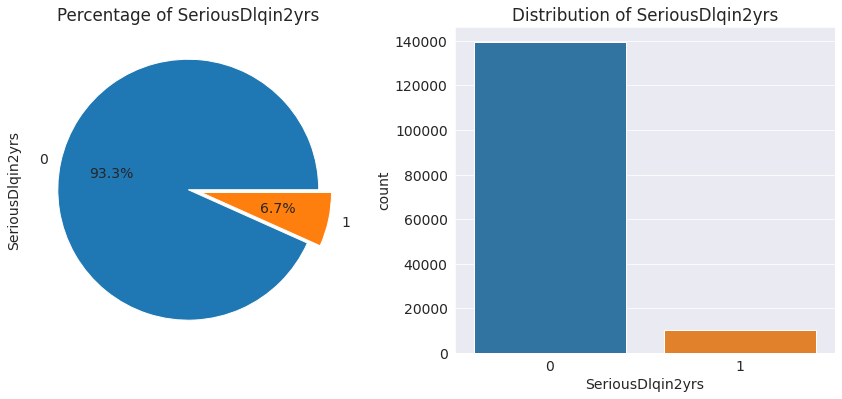

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
train_df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of SeriousDlqin2yrs')
sns.countplot(x='SeriousDlqin2yrs',data=train_df,ax=ax2)
ax2.set_title('Distribution of SeriousDlqin2yrs')
plt.show();

- The ratio of negative to positive delinquency outliers are found to be 93.3% to 6.7%, which is approximately a ratio of 14:1. Therefore, our dataset is highly imbalanced. We cannot rely on the accuracy scores to predict the model's success.
- we also have null values in the dataset, as the positive delinquency percentage is very less, we will also see how much this null value rows are distributed in the target column.   

In [ ]:
nul_value_df = train_df[train_df.isnull().any(axis=1)]
nul_value_df["SeriousDlqin2yrs"].value_counts()

0    27567
1     1654
Name: SeriousDlqin2yrs, dtype: int64

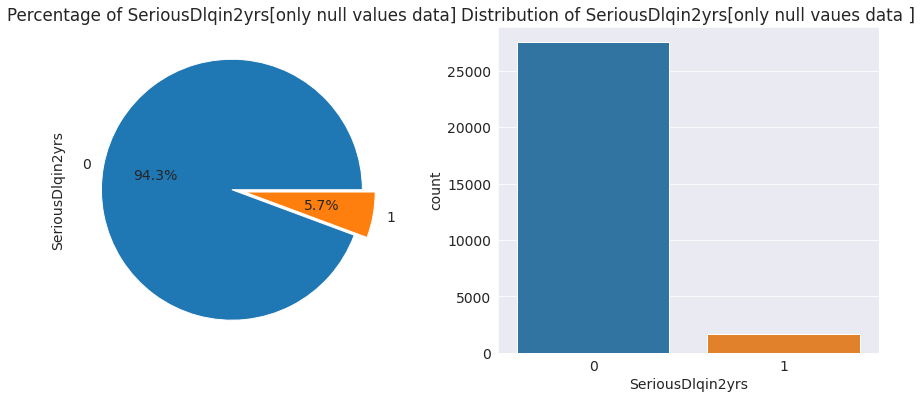

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
nul_value_df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of SeriousDlqin2yrs[only null values data]')
sns.countplot(x='SeriousDlqin2yrs',data=nul_value_df,ax=ax2)
ax2.set_title('Distribution of SeriousDlqin2yrs[only null vaues data ]')
plt.show();

In [ ]:
## Checking the missing value rows of class-1
mssing_class_2_percent = '{:.2f}%'.format((nul_value_df["SeriousDlqin2yrs"].value_counts()[1]/train_df["SeriousDlqin2yrs"].value_counts()[1])*100)
mssing_class_2_values = nul_value_df["SeriousDlqin2yrs"].value_counts()[1]
print(f"There are about {mssing_class_2_values} observations with missing values having target as class-1 which is {mssing_class_2_percent} of total class-1 values")

There are about 1654 observations with missing values having target as class-1 which is 16.53% of total class-1 values


**Observations**: 
*   The Dataset has large class imbalance with a ratio of classes being (14:1)
*   About 17% of the class-1 values are impacted by the missing values, we will deal with this missing values later.



### age

In [ ]:
train_df["age"].value_counts().to_frame().sort_index().T

,0,21,22,23,24,25,26,27,28,29,...,96,97,98,99,101,102,103,105,107,109
age,1,162,368,592,783,938,1186,1330,1556,1694,...,17,17,6,8,3,3,3,1,1,2


- we have an observation with age as '0' we will drop this.

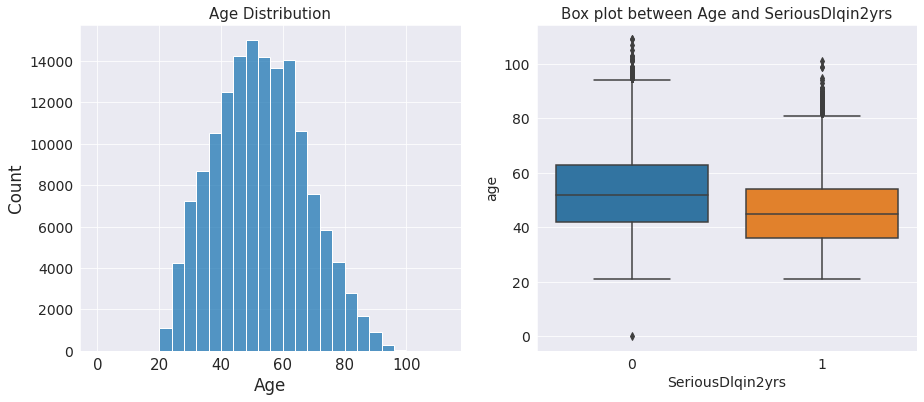

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
sns.histplot(x="age",data=train_df,binwidth=4,ax=ax1)
ax1.set_xlabel("Age",fontsize="large")
ax1.set_ylabel("Count",fontsize="large")
ax1.tick_params(axis='x', which='both', labelsize=15)
ax1.set_title("Age Distribution",fontsize=15)
sns.boxplot(y='age',x='SeriousDlqin2yrs',data=train_df,ax=ax2)
ax2.set_title("Box plot between Age and SeriousDlqin2yrs",fontsize=15)
fig.show();

- The distribution is right skewed, also we can see the obesrvations with high age not being defaulted directly.

**observations**:  
- The distribution of classes bases on the age is similar but after the age of 100, most of the observations are defaulted. Generally, a creditor such as a lender or broker cannot use your age to make credit decisions.([source](https://www.consumerfinance.gov/ask-cfpb/can-a-lender-or-broker-consider-my-age-when-deciding-whether-to-give-me-a-mortgage-or-home-equity-loan-en-346/)).This could be because a lender or broker may consider your job and length of time to retirement to determine whether your income (including your retirement income) will be adequate for the life of the loan. 
- To deal with higher values of age instead of removing them we will replace the observations with age > 100 to age = 100 

### MonthlyIncome

In [ ]:
train_df["MonthlyIncome"].value_counts().to_frame().sort_index().describe()

,MonthlyIncome
count,13594.000000
mean,8.839929
std,60.268074
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,2757.000000


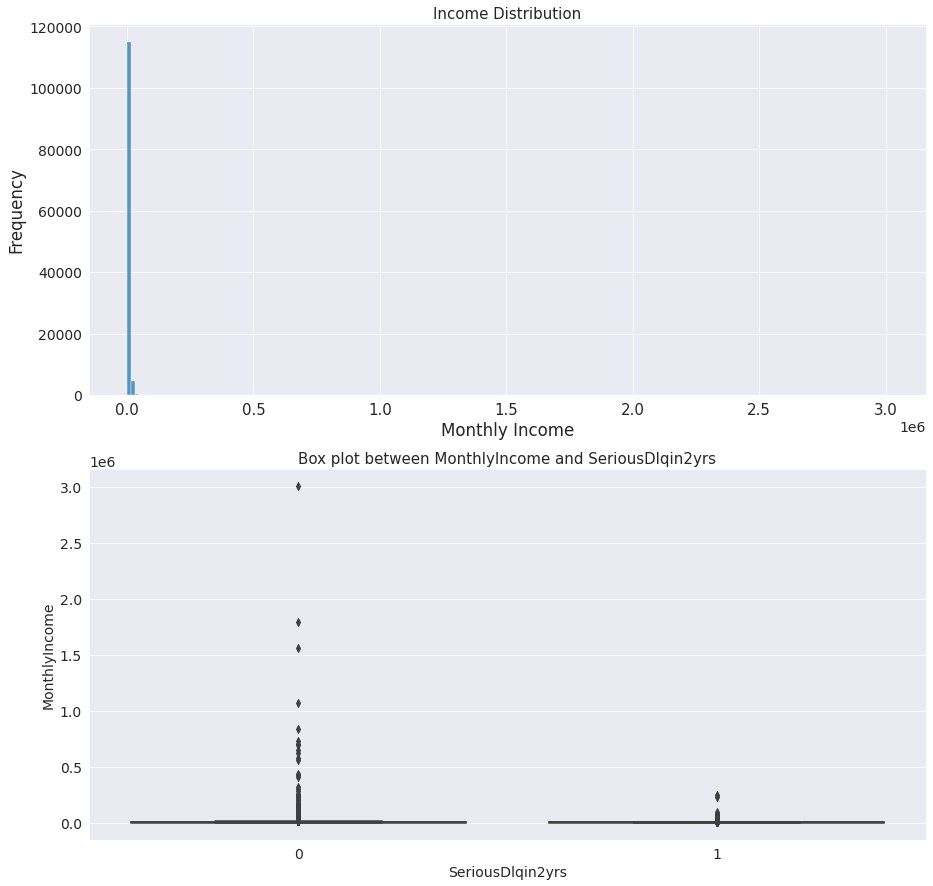

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,15))
sns.histplot(x="MonthlyIncome",bins=200,data=train_df,ax=ax1)
ax1.set_xlabel("Monthly Income",fontsize="large")
ax1.set_ylabel("Frequency",fontsize="large")
ax1.tick_params(axis='x', which='both', labelsize=15)
ax1.set_title("Income Distribution",fontsize=15)
sns.boxplot(y='MonthlyIncome',x='SeriousDlqin2yrs',data=train_df,ax=ax2)
ax2.set_title("Box plot between MonthlyIncome and SeriousDlqin2yrs",fontsize=15)
fig.show();

**observations**: 

- As expected the monthly income values are highly skewed to the right with a huge outliers.
- All the observations with very high income are not defaulted thus we can drop them. 
- we will factor in other features to work on the missing values in this Monthlyincome feature.

### NumberOfOpenCreditLinesAndLoans

In [ ]:
train_df["NumberOfOpenCreditLinesAndLoans"].value_counts().to_frame().sort_index().head()

,NumberOfOpenCreditLinesAndLoans
0,1712
1,4251
2,6558
3,8992
4,11566


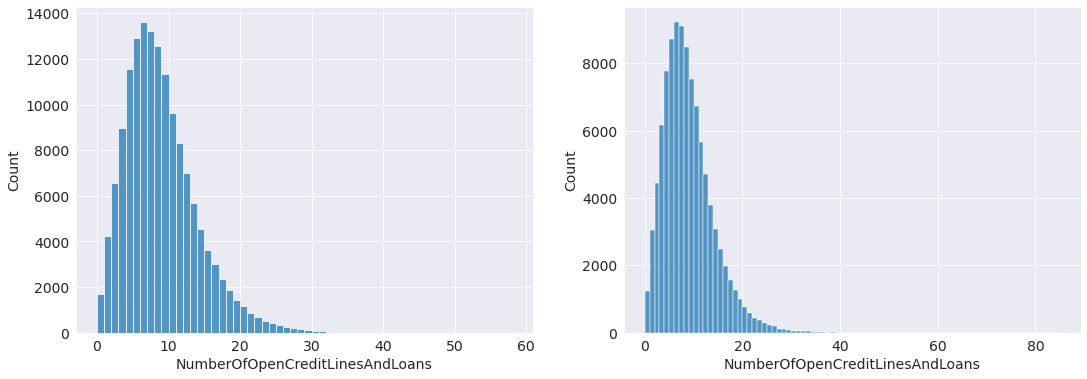

In [ ]:
# Checking the distribution and outliers in NumberOfOpenCreditLinesAndLoans
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.histplot(x = train_df['NumberOfOpenCreditLinesAndLoans'], binwidth=1, ax = axes[0])
sns.histplot(x = test_df['NumberOfOpenCreditLinesAndLoans'], binwidth=1, ax = axes[1])

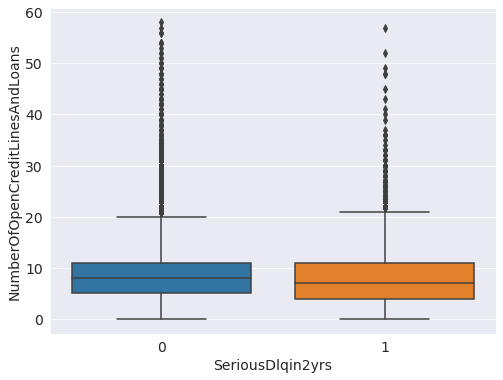

In [ ]:
# Checking outliers in age
sns.boxplot(y='NumberOfOpenCreditLinesAndLoans',x='SeriousDlqin2yrs',data=train_df);

**Observations** 
- The NumberOfOpenCreditLinesAndLoans is left skewed with not to many extreme outliers.

### NumberRealEstateLoansOrLines

In [ ]:
train_df["NumberRealEstateLoansOrLines"].value_counts().to_frame().sort_index().head()

,NumberRealEstateLoansOrLines
0,55579
1,52338
2,31522
3,6300
4,2170


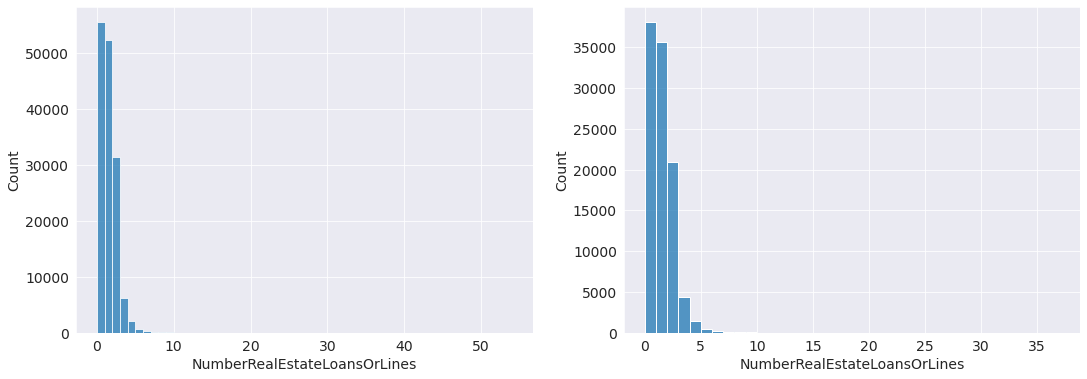

In [ ]:
# Checking the distribution and outliers in NumberRealEstateLoansOrLines
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.histplot(x = train_df['NumberRealEstateLoansOrLines'], binwidth=1, ax = axes[0])
sns.histplot(x = test_df['NumberRealEstateLoansOrLines'], binwidth=1, ax = axes[1]);

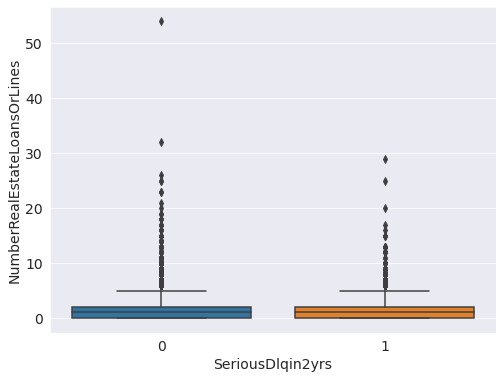

In [ ]:
sns.boxplot(y='NumberRealEstateLoansOrLines',x='SeriousDlqin2yrs',data=train_df);

**observations**: 
- This feature is highly skewed to the right, Majority of the Borrowers have between 0 to 2 Mortgage loans.

### NumberOfDependents

In [ ]:
train_df["NumberOfDependents"].value_counts().to_frame().sort_index()

,NumberOfDependents
0.0,86392
1.0,26314
2.0,19521
3.0,9483
4.0,2862
5.0,746
6.0,158
7.0,51
8.0,24
9.0,5


In [ ]:
train_df[train_df["NumberOfDependents"] > 8]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6299,0,0.226616,40,1,0.576539,6316.0,11,2,1,0,20.0
10618,0,0.000000,44,0,0.035590,12896.0,5,0,0,0,10.0
12982,0,0.325828,39,0,0.027100,4833.0,6,0,0,0,10.0
22698,0,0.139466,43,1,3621.000000,0.0,9,0,1,0,10.0
39095,0,0.079194,60,0,0.133582,7500.0,10,0,0,0,10.0
42166,0,0.099401,58,0,3592.000000,NaN,14,0,1,0,9.0
44848,0,1.000000,38,0,0.643728,2789.0,5,0,1,0,9.0
122768,0,0.494849,37,0,0.268706,3300.0,9,1,0,0,9.0
123911,0,0.017858,47,1,0.368932,9166.0,7,0,1,0,10.0
128034,0,1.000000,53,1,0.230054,3333.0,3,1,1,0,13.0


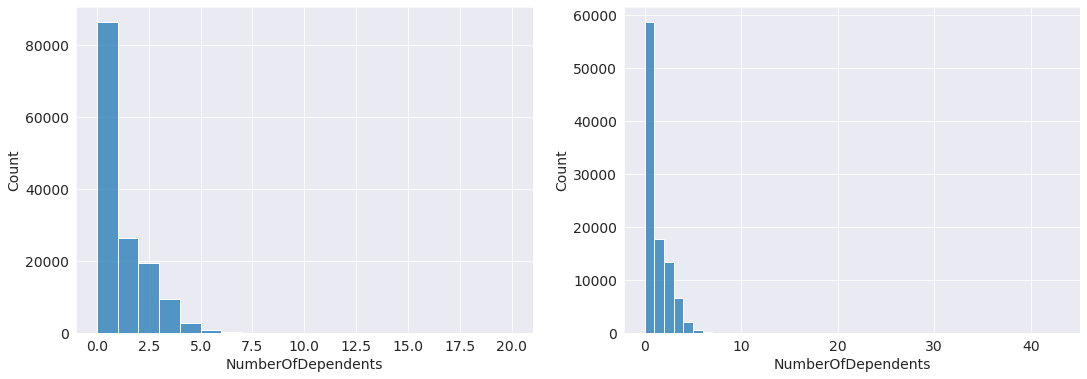

In [ ]:
# Checking the distribution and outliers in NumberRealEstateLoansOrLines
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.histplot(x = train_df['NumberOfDependents'], binwidth=1, ax = axes[0])
sns.histplot(x = test_df['NumberOfDependents'], binwidth=1, ax = axes[1]);

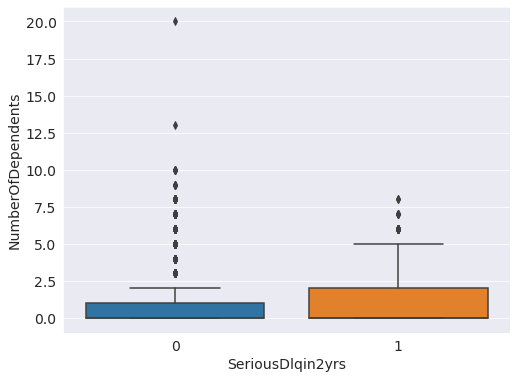

In [ ]:
sns.boxplot(y='NumberOfDependents',x='SeriousDlqin2yrs',data=train_df);

**observations**: 
- This feature is right skewed. Majority of the Borrowers have between 0 - 3 Dependents.

### DebtRatio 

- Monthly debt payments, alimony,living costs divided by monthy gross income.	

In [ ]:
train_df["DebtRatio"].describe()

count    149391.000000
mean        354.436740
std        2041.843455
min           0.000000
25%           0.177441
50%           0.368234
75%           0.875279
max      329664.000000
Name: DebtRatio, dtype: float64

- The last quartile value is increased very high this means someone owes 330,000 times what they own. Maybe that person is a single outlier? Let's take a look: 

In [ ]:
quantiles = [0.75,0.78,0.81,0.84,0.87,0.9,0.925,0.95,0.975,0.99]

for i in quantiles:
    print(i*100,'% quantile of debt ratio is: ',round(train_df["DebtRatio"].quantile(i),2))

75.0 % quantile of debt ratio is:  0.88
78.0 % quantile of debt ratio is:  1.3
81.0 % quantile of debt ratio is:  15.0
84.0 % quantile of debt ratio is:  126.0
87.0 % quantile of debt ratio is:  648.0
90.0 % quantile of debt ratio is:  1275.0
92.5 % quantile of debt ratio is:  1808.88
95.0 % quantile of debt ratio is:  2455.5
97.5 % quantile of debt ratio is:  3494.0
99.0 % quantile of debt ratio is:  4985.1


As we can see there is a huge rise in quantile post 81%. So, our main aim would be to check the potential outliers beyond 81% quantiles. However, since our data is 150,000, let's consider 95% and 97.5% quantiles for our further analysis.

In [ ]:
train_df["DebtRatio"].quantile(0.95)

2455.5

In [ ]:
train_df.loc[train_df["DebtRatio"] > train_df["DebtRatio"].quantile(0.95)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe().T

,count,mean,std,min,25%,50%,75%,max
DebtRatio,7470.0,4424.272155,7887.168137,2456.0,2897.0,3494.0,4623.0,329664.0
MonthlyIncome,377.0,0.084881,0.279074,0.0,0.0,0.0,0.0,1.0
SeriousDlqin2yrs,7470.0,0.055288,0.228556,0.0,0.0,0.0,0.0,1.0


- The Monthlyincome and SeriousDlqin2yrs seems to have same distribution.

In [ ]:
len(train_df[(train_df["DebtRatio"] > train_df["DebtRatio"].quantile(0.95)) & (train_df['SeriousDlqin2yrs'] == train_df['MonthlyIncome'])])

329

In [ ]:
train_df.loc[train_df["DebtRatio"] > train_df["DebtRatio"].quantile(0.95)]["MonthlyIncome"].value_counts()

0.0    345
1.0     32
Name: MonthlyIncome, dtype: int64

In [ ]:
print("Number of people who owe around 2455.5 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: {}"\
     .format(len(train_df.loc[(train_df["DebtRatio"] > train_df["DebtRatio"].quantile(0.95)) & (train_df["MonthlyIncome"] == train_df["SeriousDlqin2yrs"])])))

Number of people who owe around 2455.5 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: 329


In [ ]:
train_df["DebtRatio"].quantile([.975])

0.975    3494.0
Name: DebtRatio, dtype: float64

- Apparently 2.5% of the dataset owes more than 3,500 times what they own.

In [ ]:
top_value = train_df["DebtRatio"].quantile([.975])
train_df[train_df["DebtRatio"] > top_value[0.975]][["SeriousDlqin2yrs","NumberOfDependents","MonthlyIncome"]].describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,3734.0,0.064542,0.245749,0.0,0.0,0.0,0.0,1.0
NumberOfDependents,3504.0,0.562215,1.047874,0.0,0.0,0.0,1.0,10.0
MonthlyIncome,184.0,0.059783,0.237731,0.0,0.0,0.0,0.0,1.0


- we could observe that there are nearly 3750 records with debtRatio > 3500 and out of these only 185 obsrvations have income values. 
- These 184 entries also have either 0 or 1 as Monthly income.

In [ ]:
train_df[(train_df['DebtRatio'] > top_value[0.975]) & (train_df['SeriousDlqin2yrs'] == train_df['MonthlyIncome'])].shape[0]

164

- of the 184 entries,164 of them have the same value for 2 year default rate and monthly income, indicating that there is a data-entry error.

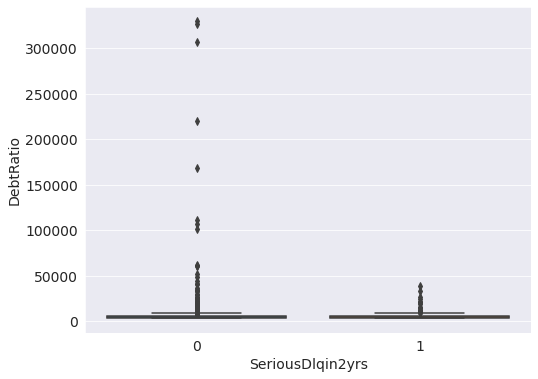

In [ ]:
sns.boxplot(y='DebtRatio',x='SeriousDlqin2yrs',data=train_df[train_df["DebtRatio"] > top_value[0.975]]);

- Despite the high depth ratio, these are defaulting as general population. Thus we can conclude the this is a data entry errors and we can remove these from our observations. 

**Observations**: 
- The feature is highly right skewed. and most of the customers have debt ratio under 10

### Historical late repayment features

- <strong>NumberOfTime30-59DaysPastDueNotWorse </strong> : Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
-  <strong>NumberOfTime60-89DaysPastDueNotWorse</strong> : Number of times borrower has been 60-89 days past due but no worse in the last 2 years
-  <strong>NumberOfTimes90DaysLate </strong>: Number of times borrower has been 90 days or more past due. 

In [ ]:
train_df["NumberOfTimes90DaysLate"].value_counts().sort_index()

0     141108
1       5232
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
Name: NumberOfTimes90DaysLate, dtype: int64

In [ ]:
train_df["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

0     141831
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       220
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [ ]:
train_df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()

0     125453
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

- The three features have 225 observations that have made late payments 96/98 times. Are all these observations belong to same or difffernt observations? 

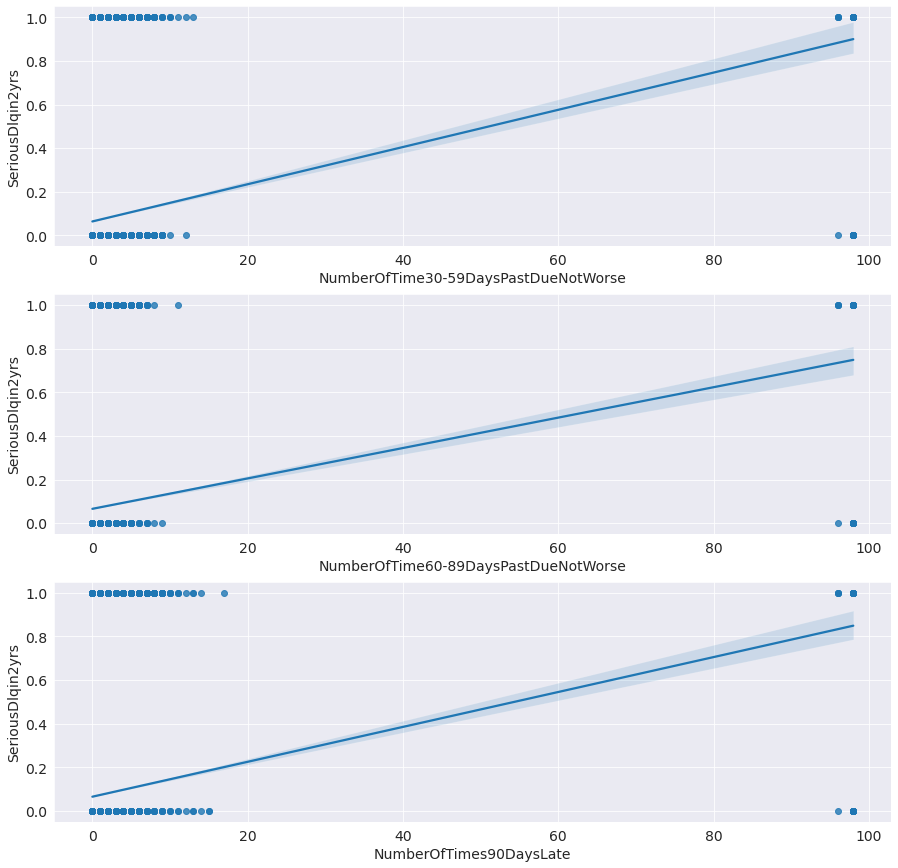

In [ ]:
historic_late_columns = ["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTime60-89DaysPastDueNotWorse","NumberOfTimes90DaysLate"]
fig = plt.figure(figsize=[15,15])

for col,i in zip(historic_late_columns,range(1,4)):
    axes = fig.add_subplot(3,1,i)
    sns.regplot(data=train_df,x=col,y="SeriousDlqin2yrs",ax=axes)
plt.show();

-  From the above plot we can observe that in the columns NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate, we see delinquency range beyond 90 which is common across all 3 features.

In [ ]:
## Checking if the ouliers belongs to the same observations
train_df[(train_df["NumberOfTimes90DaysLate"] > 20) & (train_df["NumberOfTime30-59DaysPastDueNotWorse"] > 20) & (train_df["NumberOfTime60-89DaysPastDueNotWorse"] > 20)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1733,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2286,0,1.0,22,98,0.0,NaN,0,98,0,98,0.0
3884,0,1.0,38,98,12.0,NaN,0,98,0,98,0.0
4417,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4705,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
147258,1,1.0,25,98,0.0,NaN,0,98,0,98,NaN
147774,1,1.0,68,98,255.0,NaN,0,98,0,98,0.0
149153,1,1.0,24,98,54.0,NaN,0,98,0,98,0.0
149239,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.0


In [ ]:
late_payment_filt = (train_df["NumberOfTimes90DaysLate"] > 20) & (train_df["NumberOfTime30-59DaysPastDueNotWorse"] > 20) & (train_df["NumberOfTime60-89DaysPastDueNotWorse"] > 20)
train_df.loc[late_payment_filt,["SeriousDlqin2yrs"]].value_counts() 

SeriousDlqin2yrs
1                   136
0                    89
dtype: int64

- We can impute these 225 recors by replacing all the 96/98s with 25 to make them not extreme outliers. We don't expect that to improve the random forests, which are robust to outliers, but it might improve the Linear models and SVMs.

**observations**: 
- The 225 records are clearly some data discrepency but we cannot drop them as they are defaulting at a massive rate then population.  
- Most of the population have this feature values as '0', which means they are paying the bills with in the due date. 

### RevolvingUtilizationOfUnsecuredLines

In [ ]:
train_df["RevolvingUtilizationOfUnsecuredLines"].describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [ ]:
quantiles = [0.75,0.78,0.81,0.84,0.87,0.9,0.925,0.95,0.975,0.99]

for i in quantiles:
    print(i*100,'% quantile of RevolvingUtilizationOfUnsecuredLines is: ',round(train_df["RevolvingUtilizationOfUnsecuredLines"].quantile(i),2))

75.0 % quantile of RevolvingUtilizationOfUnsecuredLines is:  0.56
78.0 % quantile of RevolvingUtilizationOfUnsecuredLines is:  0.64
81.0 % quantile of RevolvingUtilizationOfUnsecuredLines is:  0.73
84.0 % quantile of RevolvingUtilizationOfUnsecuredLines is:  0.82
87.0 % quantile of RevolvingUtilizationOfUnsecuredLines is:  0.91
90.0 % quantile of RevolvingUtilizationOfUnsecuredLines is:  0.98
92.5 % quantile of RevolvingUtilizationOfUnsecuredLines is:  1.0
95.0 % quantile of RevolvingUtilizationOfUnsecuredLines is:  1.0
97.5 % quantile of RevolvingUtilizationOfUnsecuredLines is:  1.0
99.0 % quantile of RevolvingUtilizationOfUnsecuredLines is:  1.09


In [ ]:
## checking the Delinquency for the ratio greater than 1
train_df[(train_df["RevolvingUtilizationOfUnsecuredLines"] > 1)]["SeriousDlqin2yrs"].value_counts() 

0    2084
1    1237
Name: SeriousDlqin2yrs, dtype: int64

- more than 50% are defaulting with RevolvingUtilizationOfUnsecuredLines > 1 , this observations are important but we will remove the observations with very high RevolvingUtilizationOfUnsecuredLines value

In [ ]:
train_df[(train_df["RevolvingUtilizationOfUnsecuredLines"] > 10)]["RevolvingUtilizationOfUnsecuredLines"].describe()

count      241.000000
mean      3564.023932
std       5123.802683
min         11.385230
25%        941.000000
50%       2012.000000
75%       4116.000000
max      50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [ ]:
train_df[(train_df["RevolvingUtilizationOfUnsecuredLines"] > 10)]["SeriousDlqin2yrs"].value_counts()

0    224
1     17
Name: SeriousDlqin2yrs, dtype: int64

- These 229 values are defaulting similar to population even though some of them owing hundreds of thousands of times their credit limits. this is inconsistent with the data, so we will droip them.

### Corrleation

In [ ]:
train_df.shape

(149391, 11)

In [ ]:
train_df.corr()["SeriousDlqin2yrs"].sort_values(ascending=False).to_frame()

,SeriousDlqin2yrs
SeriousDlqin2yrs,1.000000
NumberOfTime30-59DaysPastDueNotWorse,0.131517
NumberOfTimes90DaysLate,0.122495
NumberOfTime60-89DaysPastDueNotWorse,0.106257
NumberOfDependents,0.045786
RevolvingUtilizationOfUnsecuredLines,-0.001818
NumberRealEstateLoansOrLines,-0.007631
DebtRatio,-0.007719
MonthlyIncome,-0.019814
NumberOfOpenCreditLinesAndLoans,-0.030535


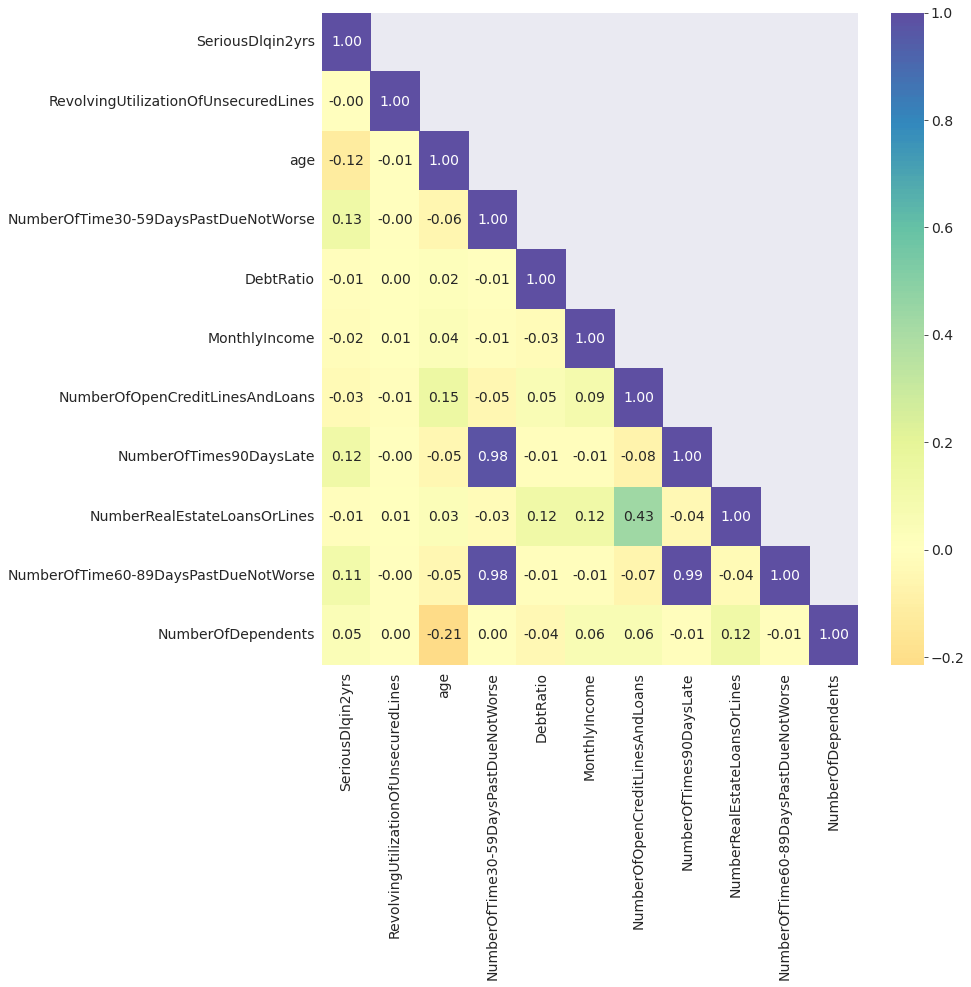

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,12))
mask = np.zeros_like(train_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask,k=1)] = True
sns.heatmap(train_df.corr(),annot=True, fmt = ".2f", cmap = "Spectral",mask=mask,center=0);

**Observations** : 
- We can see that the Target has the highest positive correlation with Historical late repayment features, RevolvingUtilizationOfUnsecuredLines and negative corrleation with age. 

### EDA Inferences

- Only **7%** of the total samples have **defaulted**.
- MonthlyIncome and NumberOfDependents have **29731 (19.82%)** and **3924 (2.62%)** null values, respectively.
There seem to be younger people defaulting, and the distribution of age seems fine on the whole. 
- The distribution of the monthly income is **highly skewed**, and it also has a less correlation with other features. Hence, we can impute the missing values with the median of this column. And also the **extreme outliers** in monthly income are not defaulting, as in the population. 
- The Number of credit loansor Real Estate loans is **right-skewed with no extreme outliers** and the defaulting of the outliers seems consistent with the population.
- NumberOfDependents is less correlated with the target and the distribution is **right-skewed**. 
- About **2.5%** of clients owe around 3494 or more times what they own and For the people who have a monthly income in this 2.5%, only 185 people have values for their monthly incomes and the values are either 0 or 1 out of which 164 are matching with the target column. Thus we can conclude these are **data errors and can be dropped**.
- When NumberOfTimes90DaysLate has values above **17**, there are **225** instances where the three columns NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse share the same values, specifically 96 and 98. And also We can see that sharing the same values of 96 and 98 respectively is not logical since 30 days past due for **96 times** for a single person within a time span of 2 years is not possible.
- The Historical late payment fetaures are **corrleated with one another** we can try models with dropping one of this fetaures. 
- RevolvingUtilizationOfUnsecuredLines is defined as the ratio of the total amount of money owed to the total credit limit. However, the **extreme values** are **defaulting as population**.

### EDA Conclusion.

- The dataset has **imbalanced class distribution** with outliers in the majority of the features. The conventional Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets. Thus we need to consider a strategy to balance classes either by increasing the frequency of the minority class or decreasing the frequency of the majority class. 

### Preprocessing Suggestions



> The values with age as '0' can be dropped and the extreme age values can be replaced with 100. 


> The missing values of MonthlyIncome can be imputed with median value and the extreme income values can be dropped.



> The missing values of NumberOfDependents can be imputed with its mode that is '0'. 


> The samples with values of DebtRatio above its 97.5 percentile can be dropped. 


> The historical late payment features with the values 96/98 can be replaced  with a value close to the population. 



> The extreme values in RevolvingUtilizationOfUnsecuredLines can be dropped.













## Data Preprocessing and Feature Engineering

### Data Cleaning

- Drop the rows as per the suggestions from EDA

In [ ]:
## Drop the rows with age = 0
train_df = train_df[train_df["age"] != 0] 
train_df.shape

(149390, 11)

In [ ]:
## Droping the Monthlyincome value rows that are greater than 500000
train_df = train_df[~(train_df["MonthlyIncome"] > 500000)] 
train_df.shape

(149378, 11)

In [ ]:
## Droping the DebtRatio rows that are above its 97.5 percentile
top_value = train_df["DebtRatio"].quantile([.975])
train_df = train_df[~(train_df['DebtRatio'] > top_value[0.975])] 
train_df.shape

(145644, 11)

In [ ]:
## Droping the RevolvingUtilizationOfUnsecuredLines rows which are greater than 10 
train_df = train_df[~(train_df["RevolvingUtilizationOfUnsecuredLines"] > 10)]
train_df.shape

(145415, 11)

- Define a function to replace the extreme outliers with the values close to population

In [ ]:
### Constants to be replaced 
LATE_PAYMENT_CONST = 20  ##The population has the highest number as 17, we can tweek this value later 
AGE_CONST = 100 ##This Value could be anything between 90-100 as we will perform binning on this feature

def replace_with_consts(input_df): 
    """
    Replace the values in the dataframe with the predefined values
    currently defined constants: 
    LATE_PAYMENT_CONST = 20
    AGE_CONST = 100
    """
    # Replace the age observations with age > AGE_CONST to age = AGE_CONST 
    age_filter = input_df["age"] > AGE_CONST
    input_df.loc[age_filter,["age"]] = AGE_CONST 

    # Replace the extreme values NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWors, NumberOfTimes90DaysLate
    # with LATE_PAYMENT_CONST 
    late_payment_filt = (input_df["NumberOfTimes90DaysLate"] > LATE_PAYMENT_CONST) & (input_df["NumberOfTime30-59DaysPastDueNotWorse"] > LATE_PAYMENT_CONST) & (input_df["NumberOfTime60-89DaysPastDueNotWorse"] > LATE_PAYMENT_CONST)
    input_df.loc[late_payment_filt,["NumberOfTime60-89DaysPastDueNotWorse","NumberOfTimes90DaysLate","NumberOfTime30-59DaysPastDueNotWorse"]] = LATE_PAYMENT_CONST  

    return input_df


In [ ]:
### replacing the outliers with the constants in age,NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWors, NumberOfTimes90DaysLate features
train_df = replace_with_consts(train_df)
test_df = replace_with_consts(test_df)

- we will reduce the memory of the dataset by converting the dtypes of the columns

In [ ]:
## Chamge the SeriousDlqin2yrs to a category column 
train_df["SeriousDlqin2yrs"] = train_df["SeriousDlqin2yrs"].astype("category")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145415 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   SeriousDlqin2yrs                      145415 non-null  category
 1   RevolvingUtilizationOfUnsecuredLines  145415 non-null  float64 
 2   age                                   145415 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  145415 non-null  int64   
 4   DebtRatio                             145415 non-null  float64 
 5   MonthlyIncome                         119800 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       145415 non-null  int64   
 7   NumberOfTimes90DaysLate               145415 non-null  int64   
 8   NumberRealEstateLoansOrLines          145415 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  145415 non-null  int64   
 10  NumberOfDependents                    141830 non-null  f

In [ ]:
## Function for reducing memory usage of a pandas dataframe ##  # Author : https://www.kaggle.com/code/arjanso/reducing-dataframe-memory-size-by-65 
def reduce_mem_usage(df):
    """
    Reduce the memory by changing the dtypes of columns based on the max and min value of a column
    """ 
    initial_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(initial_mem))
    for col in df.columns:
        if df[col].isna().sum() == 0: 
            col_type = df[col].dtype
            name =df[col].dtype.name 
            ## changing the dtypes for numeric columns
            if col_type != object and col_type.name != 'category':
                c_min = df[col].min()
                c_max = df[col].max()
                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    #continue
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
            else:
                    df[col] = df[col].astype('category')

    final_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(final_mem))
    print('Decreased by {:.1f}%'.format(100 * (initial_mem - final_mem) / initial_mem))

    return df

In [ ]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 12.34 MB
Memory usage after optimization is: 4.85 MB
Decreased by 60.7%


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145415 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   SeriousDlqin2yrs                      145415 non-null  category
 1   RevolvingUtilizationOfUnsecuredLines  145415 non-null  float16 
 2   age                                   145415 non-null  int8    
 3   NumberOfTime30-59DaysPastDueNotWorse  145415 non-null  int8    
 4   DebtRatio                             145415 non-null  float16 
 5   MonthlyIncome                         119800 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       145415 non-null  int8    
 7   NumberOfTimes90DaysLate               145415 non-null  int8    
 8   NumberRealEstateLoansOrLines          145415 non-null  int8    
 9   NumberOfTime60-89DaysPastDueNotWorse  145415 non-null  int8    
 10  NumberOfDependents                    141830 non-null  f

- The NumberOfDependents, MonthlyIncome columns have null values, so we cannot cast them as integer. As the memory usage of dataframe is reduced by about 75% we will stop here. 

In [ ]:
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 7.74 MB
Memory usage after optimization is: 2.71 MB
Decreased by 65.0%


### Imputation

- We have Missing Values in NumberOfDependents and  MonthlyIncome features

In [ ]:
# ### Imputing the missing values by creating a simple Pipeline for differnt features  
# median_features = ["MonthlyIncome"]
# mode_features = ["NumberOfDependents"]
# customImputer = ColumnTransformer(
#     [
#         ('median_imputer', SimpleImputer(strategy = 'median'), median_features),
#         ('mode_imputer', SimpleImputer(strategy='constant',fill_value= 0), mode_features)
#     ],
#     remainder = 'passthrough' ## All other features are passed through
# )

In [ ]:
### Using Pandas 
impute_dict = {
"NumberOfDependentsMode" : train_df["NumberOfDependents"].mode()[0],
"MonthlyIncomeMedian" : train_df["MonthlyIncome"].median()
}
def impute_missing(df): 
    df["NumberOfDependents"].fillna(impute_dict["NumberOfDependentsMode"],inplace=True)
    df["MonthlyIncome"].fillna(impute_dict["MonthlyIncomeMedian"],inplace=True)
    return df

print("The Values for Imputation are: " ,impute_dict )

The Values for Imputation are:  {'NumberOfDependentsMode': 0.0, 'MonthlyIncomeMedian': 5400.0}


In [ ]:
## Impute the missing Values
train_df = impute_missing(train_df)
test_df = impute_missing(test_df) 

### Feature Engineering

- Now our Data is cleaned with out any null values, we will extract some features from the original features.

In [ ]:
## Training Data and Target Data
input_df = train_df.drop("SeriousDlqin2yrs",axis=1).copy()
target_df = train_df.loc[:,["SeriousDlqin2yrs"]].copy()

In [ ]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145415 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  145415 non-null  float16
 1   age                                   145415 non-null  int8   
 2   NumberOfTime30-59DaysPastDueNotWorse  145415 non-null  int8   
 3   DebtRatio                             145415 non-null  float16
 4   MonthlyIncome                         145415 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       145415 non-null  int8   
 6   NumberOfTimes90DaysLate               145415 non-null  int8   
 7   NumberRealEstateLoansOrLines          145415 non-null  int8   
 8   NumberOfTime60-89DaysPastDueNotWorse  145415 non-null  int8   
 9   NumberOfDependents                    145415 non-null  float64
dtypes: float16(2), float64(2), int8(6)
memory usage: 4.7 MB


#### Monthly Debt of the customer.

- We can calculate the Monthly Debt by multiplying Monthly income to Debt Ratio.

In [ ]:
### we will caluculate the Monthly Debt for each customer
input_df["MonthlyDebt"] = input_df["DebtRatio"]*input_df["MonthlyIncome"]

In [ ]:
test_df["MonthlyDebt"] = test_df["DebtRatio"]*test_df["MonthlyIncome"]

#### MonthlyIncomePerPerson

- We can calculate the Monthly Income per person in the the family by dividing the Monthly income with No of dependents + 1

In [ ]:
input_df["MonthlyIncomePerPerson"] = input_df["MonthlyIncome"]/(input_df["NumberOfDependents"]+1)

In [ ]:
test_df["MonthlyIncomePerPerson"] = test_df["MonthlyIncome"]/(test_df["NumberOfDependents"]+1)

#### Binning

- The Numerical Features can be converted to categorical by binnng that feature. This will help in generalising the model better.

In [ ]:
## we can use scikit-learn's Function Transfomer to use pandas qcut method for creating bins 
## Age Feature
# bins = [20, 30, 40, 50, 60, np.inf]
# labels = ['young_adult', 'adult', 'middle_aged', 'elderly', 'senior_citizen']
# age_transformer = FunctionTransformer(
#     pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
#     )
# input_df["age"] = age_transformer.fit_transform(input_df["age"])
# test_df["age"] = age_transformer.transform(test_df["age"])

- The perfomance was reduced with Binning the age feature so removing it

### Scaling Numerical Features

- All the Features in our traning set are numerical. so scaling plays a major role while working many of the machine learning models.
- we will determine the best scalar by using a baseline model.As Tree models perform well without scaling, we will test this with a Logistic Regression model.

#### No Scaling

In [ ]:
### WIth out any Scaling
X = input_df.copy()
y = train_df["SeriousDlqin2yrs"].copy() 

### checking the Dataset
score_dataset(X,y,True)

Fold 0 ROC AUC score: 0.58943539
Fold 1 ROC AUC score: 0.59081146
Fold 2 ROC AUC score: 0.60959085
Fold 3 ROC AUC score: 0.64531634
Fold 4 ROC AUC score: 0.60711046
CV score: 0.60566416


#### Robust Scalar

- Both standard and robust scalers transform inputs to comparable scales. The difference lies in how they scale raw input values.

- Standard scaling uses mean and standard deviation. Robust scaling uses median and interquartile range (IQR) instead. 


$$\text {ScaledValue}= \frac{\text{OriginalValue−InputsMedian}} {\text{Inputs IQR}}$$

- The scaled values will have their median and IQR set to 0 and 1, respectively. The fact that robust scaling uses median and IQR makes it resistant to outliers.


In [ ]:
### Apply Robust Scaling
X = input_df.copy()
y = train_df["SeriousDlqin2yrs"].copy()
X[X.columns] = RobustScaler().fit_transform(X[X.columns]) 

### checking the Robust scalar 
score_dataset(X,y,True)

Fold 0 ROC AUC score: 0.83001381
Fold 1 ROC AUC score: 0.83337042
Fold 2 ROC AUC score: 0.84274780
Fold 3 ROC AUC score: 0.83409543
Fold 4 ROC AUC score: 0.84112615
CV score: 0.83622248


#### Quartile Transformer

Transform features using quantiles information. This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. The obtained values are then mapped to the desired output distribution using the associated quantile function. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

In [ ]:
### Apply Quartile Transformation
X = input_df.copy()
y = train_df["SeriousDlqin2yrs"].copy()
X[X.columns] = QuantileTransformer().fit_transform(X[X.columns]) 

### checking the Quartile Transformer
score_dataset(X,y,True)

Fold 0 ROC AUC score: 0.85113785
Fold 1 ROC AUC score: 0.84689816
Fold 2 ROC AUC score: 0.85546406
Fold 3 ROC AUC score: 0.84811227
Fold 4 ROC AUC score: 0.85697071
CV score: 0.85168664


#### Power Transformer

Apply a power transform featurewise to make data more **Gaussian-like**.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data. By default, zero-mean, unit-variance normalization is applied to the transformed data.

In [ ]:
### Apply Power Transformation
X = input_df.copy()
y = target_df.copy()
X[X.columns] = PowerTransformer().fit_transform(X[X.columns]) 

### checking the Power Transformer
score_dataset(X,y,True)

Fold 0 ROC AUC score: 0.85177202
Fold 1 ROC AUC score: 0.84765986
Fold 2 ROC AUC score: 0.85653000
Fold 3 ROC AUC score: 0.84898966
Fold 4 ROC AUC score: 0.85812861
CV score: 0.85258183


- The Power Transformer and Quartile Transformer does improve the model's performance.

In [ ]:
### Applying Power Transformation to our datasets
## creating the Power Scalar 
power_scalar = PowerTransformer().fit(input_df[input_df.columns]) 

## Scaling the Training Data
input_df[input_df.columns] = power_scalar.transform(input_df[input_df.columns])
## Scaling the Test Data
test_df[test_df.columns] = power_scalar.transform(test_df[test_df.columns]) 

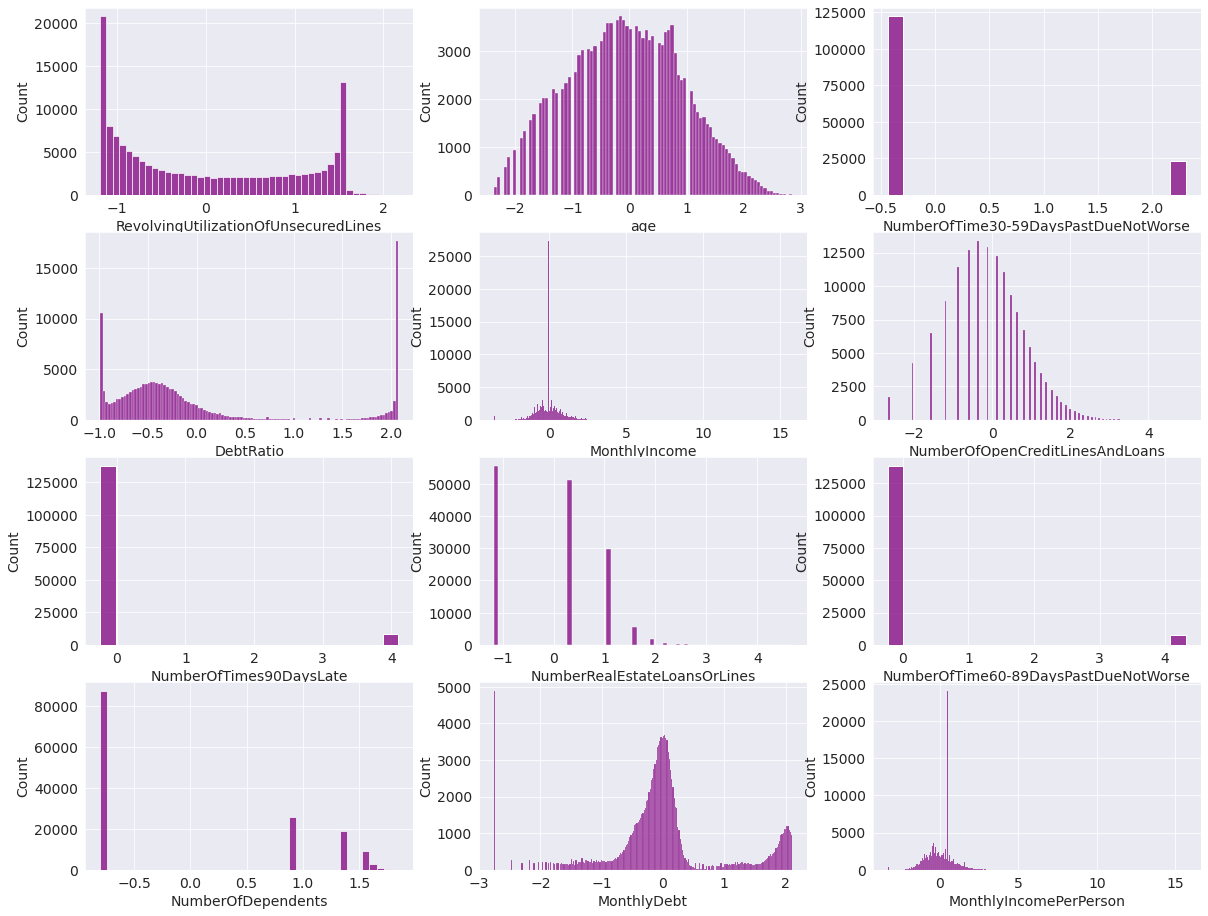

In [ ]:
### Distribution after transformation 
columnList = list(input_df.columns)
columnList

fig = plt.figure(figsize=[20,20])
for col,i in zip(columnList,range(1,13)):
    axes = fig.add_subplot(5,3,i)
    sns.histplot(input_df[col],ax=axes, kde_kws={'bw':1.5}, color='purple')
plt.show();

- As the features have a large number of outliers it is inefficient to drop them all. we will use this transfomed data and perform more actions on this outliers later. 

### Train and Validation Split

In [ ]:
X_full = input_df.copy()
y_full = target_df.copy() 
X_test = test_df.copy()

In [ ]:
y_full["SeriousDlqin2yrs"].value_counts()

0    135663
1      9752
Name: SeriousDlqin2yrs, dtype: int64

- We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

- By default train_test_split uses **Stratified Split**. so, the validation data will aslo have similar class distribution as the train data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_full, 
                                                  y_full, 
                                                  test_size=0.2, 
                                                  random_state=42)

In [ ]:
y_train["SeriousDlqin2yrs"].value_counts()

0    108521
1      7811
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
y_val["SeriousDlqin2yrs"].value_counts()

0    27142
1     1941
Name: SeriousDlqin2yrs, dtype: int64

### Saving the preprocessed dataset.

In [ ]:
!pip install pyarrow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_full.to_parquet("/content/drive/MyDrive/data/x-full.parquet")
y_full.to_parquet("/content/drive/MyDrive/data/y-full.parquet")
X_test.to_parquet("/content/drive/MyDrive/data/x-test.parquet")

In [ ]:
### reading the files from the drive

X_full = pd.read_parquet("/content/drive/MyDrive/data/x-full.parquet")
y_full = pd.read_parquet("/content/drive/MyDrive/data/y-full.parquet")
X_test = pd.read_parquet("/content/drive/MyDrive/data/x-test.parquet")

### Data augmentation

- The Resampling techniques are used to adjust the class distribution of a data set (i.e. the ratio between the different classes/categories represented). 
- The most naive class of techniques of re-sampling are changing the data presented to the model by undersampling common classes, oversampling (duplicating) rare classes, or both.

#### Over Sampling



> **Random oversampling** : Random Oversampling involves supplementing the training data with multiple copies of some of the minority classes. Oversampling can be done more than once (2x, 3x, 5x, 10x, etc.) This is one of the earliest proposed methods, that is also proven to be robust.[3] Instead of duplicating every sample in the minority class, some of them may be randomly chosen with replacement. 



In [ ]:
print("The Number of Samples in the dataset: ", len(X_full))
print('Class 0          :', round(y_full['SeriousDlqin2yrs'].value_counts()[0]
                      /len(y_full) * 100, 2), '% of the dataset')   
print('Class 1(Default) :', round(y_full['SeriousDlqin2yrs'].value_counts()[1]
                      /len(y_full) * 100, 2), '% of the dataset')

The Number of Samples in the dataset:  145415
Class 0          : 93.29 % of the dataset
Class 1(Default) : 6.71 % of the dataset


In [ ]:
### Applying Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_full, y_full)

In [ ]:
print("After Over Sampling Of Minor Class Total Samples are :", len(y_ros))
print('Class 0        :', round(y_ros["SeriousDlqin2yrs"].value_counts()[0]
                /len(y_ros) * 100, 2), '% of the dataset')
   
print('Class 1(Fraud) :', round(y_ros["SeriousDlqin2yrs"].value_counts()[1]
                /len(y_ros) * 100, 2), '% of the dataset')

After Over Sampling Of Minor Class Total Samples are : 271326
Class 0        : 50.0 % of the dataset
Class 1(Fraud) : 50.0 % of the dataset


In [ ]:
score_dataset(X_ros,y_ros,fold_scores=True)

		LGBMCLASSIFIER MODEL

Fold 0 ROC AUC score: 0.88915991
Fold 1 ROC AUC score: 0.89217776
Fold 2 ROC AUC score: 0.89274018
Fold 3 ROC AUC score: 0.89127055
Fold 4 ROC AUC score: 0.89341697
CV score: 0.89172981




> **SMOTE** : Synthetic Minority Over-sampling Technique. it involves synthesizing the  new examples from the minority class. This is used for Tabular data.



In [ ]:
### Applying SMOTE
sm = SMOTE(random_state = 42)
X_sm, y_sm = ros.fit_resample(X_full, y_full)

print("After SMOTE Over Sampling Of Minor Class Total Samples are :", len(y_sm))
print('Class 0        :', round(y_sm["SeriousDlqin2yrs"].value_counts()[0]
                 /len(y_sm) * 100, 2), '% of the dataset')
   
print('Class 1(Fraud) :', round(y_sm["SeriousDlqin2yrs"].value_counts()[1]
                 /len(y_sm) * 100, 2), '% of the dataset')

After SMOTE Over Sampling Of Minor Class Total Samples are : 271326
Class 0        : 50.0 % of the dataset
Class 1(Fraud) : 50.0 % of the dataset


In [ ]:
score_dataset(X_sm,y_sm,fold_scores=True)

Fold 0 ROC AUC score: 0.85200093
Fold 1 ROC AUC score: 0.85486696
Fold 2 ROC AUC score: 0.85573078
Fold 3 ROC AUC score: 0.85503213
Fold 4 ROC AUC score: 0.85624047
CV score: 0.85476347


#### Under Sampling



> **Random undersampling** : Randomly remove samples from the majority class, with or without replacement. This is one of the earliest techniques used to alleviate imbalance in the dataset, however, it may increase the variance of the classifier and is very likely to discard useful or important samples.



In [ ]:
rus = RandomUnderSampler(random_state = 42)
X_rus, y_rus = rus.fit_resample(X_full, y_full)
   
      
print("After Under Sampling Of Major Class Total Samples are :", len(y_rus))
print('Class 0        :', round(y_rus["SeriousDlqin2yrs"].value_counts()[0]
                /len(y_rus) * 100, 2), '% of the dataset')
   
print('Class 1(Fraud) :', round(y_rus["SeriousDlqin2yrs"].value_counts()[1]
                /len(y_rus) * 100, 2), '% of the dataset')

After Under Sampling Of Major Class Total Samples are : 19504
Class 0        : 50.0 % of the dataset
Class 1(Fraud) : 50.0 % of the dataset


In [ ]:
score_dataset(X_rus,y_rus,fold_scores=True)

		LGBMCLASSIFIER MODEL

Fold 0 ROC AUC score: 0.86098766
Fold 1 ROC AUC score: 0.86286125
Fold 2 ROC AUC score: 0.86116429
Fold 3 ROC AUC score: 0.85958693
Fold 4 ROC AUC score: 0.85890914
CV score: 0.86061869




> **Tomek links** : Tomek links remove unwanted overlap between classes where majority class links are removed until all minimally distanced nearest neighbor pairs are of the same class



In [ ]:
tkl = TomekLinks()
   
X_tkl, y_tkl = tkl.fit_resample(X_full, y_full)
   
print("After TomekLinks Under Sampling Of Major Class Total Samples are :", len(y_tkl))
print('Class 0        :', round(y_tkl["SeriousDlqin2yrs"].value_counts()[0]
                /len(y_tkl) * 100, 2), '% of the dataset')
   
print('Class 1(Fraud) :', round(y_tkl["SeriousDlqin2yrs"].value_counts()[1]
                /len(y_tkl) * 100, 2), '% of the dataset')

After TomekLinks Under Sampling Of Major Class Total Samples are : 141849
Class 0        : 93.13 % of the dataset
Class 1(Fraud) : 6.87 % of the dataset


In [ ]:
score_dataset(X_tkl,y_tkl,fold_scores=True)

		LGBMCLASSIFIER MODEL

Fold 0 ROC AUC score: 0.87531369
Fold 1 ROC AUC score: 0.86739727
Fold 2 ROC AUC score: 0.87363079
Fold 3 ROC AUC score: 0.87179672
Fold 4 ROC AUC score: 0.88155587
CV score: 0.87384472


## Data Modelling

- We will First analyse the baseline models with whole training set and analyze the models with cross validation while tuning Hyperparameters.

### Baseline Models

We train several baseline models using different learning algorithms to get a sense of what learning algorithm best performs during Stratified k-fold cross validation. In the interest of time, we perform model selection with baseline models and select the model with best performance on cross-validation score. Ideally,this selection process happens after hyperparameter tuning for all of the models.

#### NeverDefaultClassifier

- We will define a Class that will predict that no customers will default 

In [ ]:
from sklearn.base import BaseEstimator

class NeverDefaultClassifier(BaseEstimator):
    """
        Always returns the value 0 as prediction
    """
    def fit(self,X,y=None):
        pass 

    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

    def predict_proba(self,X):
        return np.zeros((len(X),2), dtype=float)   

In [ ]:
#### Let's see how our smart classifier is working 
never_default_model = NeverDefaultClassifier()
never_default_model.fit(X_full,y_full)

- The below is the custom classification report which gives us some important metrics about our model. 

		NEVERDEFAULTCLASSIFIER MODEL

ROC AUC Score : 50.00%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.294 |         nan |        0 |        nan |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.93 |        1 |       0.97 |         135663 |
|       1 |        0    |        0 |       0    |           9752 |




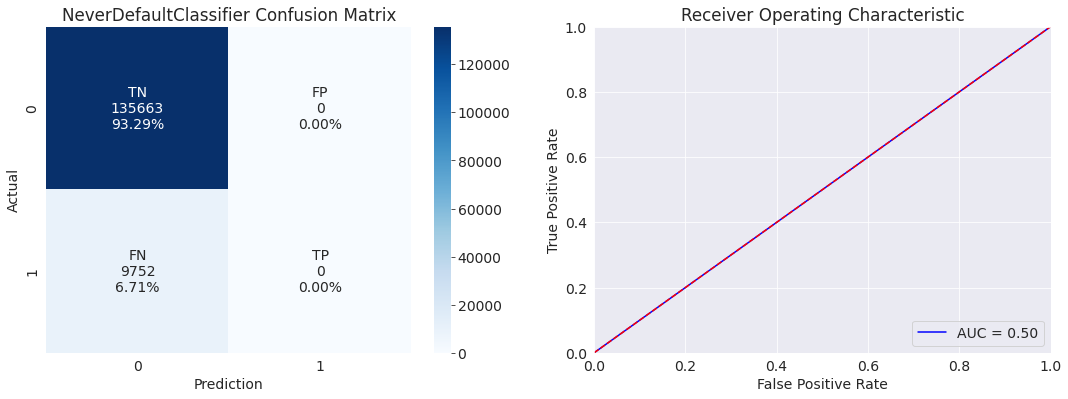

In [ ]:
make_classification_report(never_default_model,X_full,y_full,"NeverDefaultClassifier")

- if the Output Class contain only 1 type of predictions then the ROC Curve is straight line with a slope of 45 degrees passing through the origin.

### Non Tree Models

#### Logistic Regression

<p>This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.</p> 
<p>In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:<p>

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k 

![](https://media5.datahacker.rs/2021/01/44-1536x707.jpg) 

<p>In this logistic regression equation, logit(pi) is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.</p> 
<p>For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit.</p>

[source](https://www.ibm.com/topics/logistic-regression) 


![](https://media5.datahacker.rs/2021/01/83-1536x868.jpg) 





In [ ]:
### Create a model 
lr_model = LogisticRegression(solver='liblinear',random_state=42)
lr_model = score_model(lr_model,X_train,y_train,record=True)

		LOGISTICREGRESSION MODEL

Fold 0 ROC AUC score: 0.85670882
Fold 1 ROC AUC score: 0.85642590
Fold 2 ROC AUC score: 0.85570709
Fold 3 ROC AUC score: 0.85232333
Fold 4 ROC AUC score: 0.84434128

		Training Scores

ROC AUC Score : 85.34%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.546 |      55.944 |   18.256 |     27.529 |


		LOGISTICREGRESSION MODEL

ROC AUC Score : 85.06%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|      93.57 |      55.754 |   17.723 |     26.896 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.94 |     0.99 |       0.97 |          27142 |
|       1 |        0.56 |     0.18 |       0.27 |           1941 |




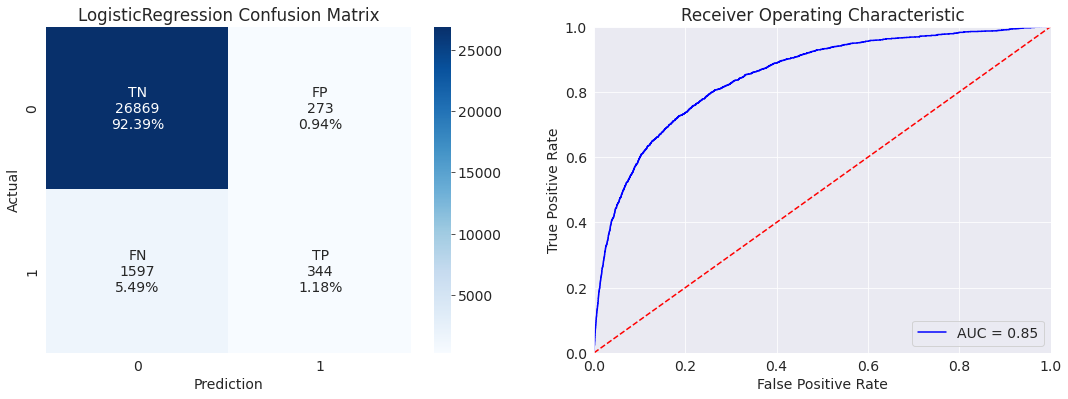

In [ ]:
make_classification_report(lr_model,X_val,y_val,record=True)

- The ROC AUC score is 85%. But the Recall and F1 scores are low. Thus we can say our model is failing to predict the **True Positives**

#### Gaussian Naive Bayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.
<p><strong>Note</strong>: The assumptions made by Naive Bayes are not generally correct in real-world situations. In-fact, the independence assumption is never correct but often works well in practice.</p> 

<center><p><strong>Bayes’ Theorem</strong></p></center>

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-7777aa719ea14857115695676adc0914_l3.svg" alt="Naive Bayes Equations" width="200" height="50"></center> 

where A and B are events and P(B) ≠ 0.

Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
- P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
- P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.  

Now, with regards to our dataset, we can apply Bayes’ theorem in following way:

<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-e85875a7ff9e9b557eab6281cc7ff078_l3.svg" alt="Naive Bayes Equations" width="200" height="50"></center>  

where, y is class variable and X is a dependent feature vector (of size n)  
<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-5385a4693c3fb17811cf36593978a601_l3.svg" alt="Naive Bayes Equations" width="200" height="50"></center> 

After substituting and solving the above equation we get the below 

<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-c778553cb5a67518205ac6ea18502398_l3.svg" alt="Naive Bayes Equations" width="300" height="45"></center> 

Now, To create a classifier model. we need to find the probability of given set of inputs for all possible values of the class variable y and pick up the output with maximum probability. This can be expressed mathematically as:  

<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-f3637f468262bfbb4accb97da8110028_l3.svg" alt="Naive Bayes Equations" width="300" height="45"></center> 

So, finally, we are left with the task of calculating P(y) and P(xi | y).

Please note that P(y) is also called class probability and P(xi | y) is called conditional probability.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of P(xi | y). 

<center><p><strong>Gaussian Naive Bayes classifier</strong></p></center> 

In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values as shown below: 
<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/naive-bayes-classification-1.png" alt="Naive Bayes Equations" width="300" height="200"></center>  

The likelihood of the features is assumed to be <a href="https://en.wikipedia.org/wiki/Gaussian_function">Gaussian</a>, hence, conditional probability is given by:  

<center><img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-7fb78d7323fcbade0cb664161a8e84c4_l3.svg" alt="Naive Bayes Equations" width="300" height="45"></center>   


















In [ ]:
gnb_model = GaussianNB()
gnb_model = score_model(gnb_model,X_train,y_train,record=True)

		GAUSSIANNB MODEL

Fold 0 ROC AUC score: 0.85654370
Fold 1 ROC AUC score: 0.85141703
Fold 2 ROC AUC score: 0.85534796
Fold 3 ROC AUC score: 0.84826518
Fold 4 ROC AUC score: 0.84234977

		Training Scores

ROC AUC Score : 85.10%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     90.732 |      35.921 |   48.521 |     41.281 |


		GAUSSIANNB MODEL

ROC AUC Score : 84.75%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     90.359 |      33.893 |    46.78 |     39.307 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.96 |     0.93 |       0.95 |          27142 |
|       1 |        0.34 |     0.47 |       0.39 |           1941 |




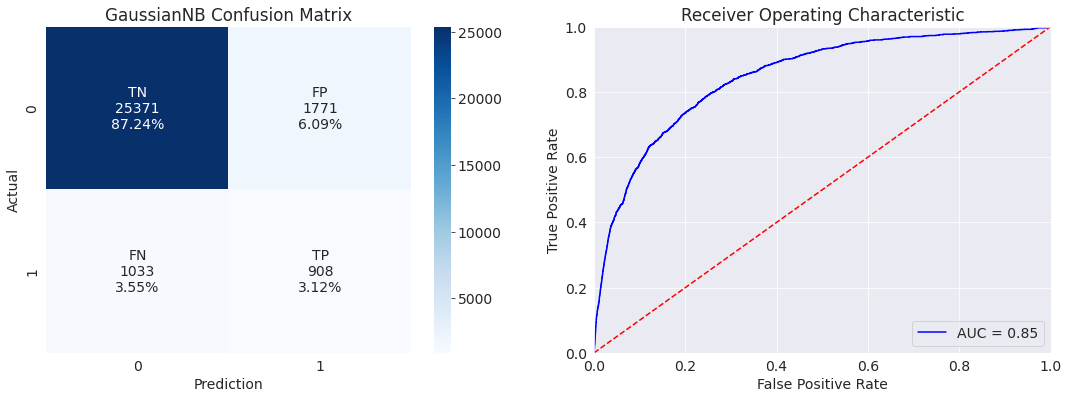

In [ ]:
make_classification_report(gnb_model,X_val,y_val,record=True)

- The Recall and F1 Score of the GaussianNB is more than Logistic Regresssion. Thus it is predecting the True Positives better than Logistic regression baseline model. 

#### SVM(Support Vector Machines)

Support Vector Machine, or SVM, is one of the most popular supervised learning algorithms, and it can be used both for classification as well as regression problems. However, in machine learning, it is primarily used for classification problems. 

- In the SVM algorithm, each data item is plotted as a point in n-dimensional space, where n is the number of features we have at hand, and the value of each feature is the value of a particular coordinate.

- The goal of the SVM algorithm is to create the best line, or decision boundary, that can segregate the n-dimensional space into distinct classes, so that we can easily put any new data point in the correct category, in the future. This best decision boundary is called a hyperplane. 
- The best separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class. Indeed, there are many hyperplanes that might classify the data. Aas reasonable choice for the best hyperplane is the one that represents the largest separation, or margin, between the two classes.

The SVM algorithm chooses the extreme points that help in creating the hyperplane. These extreme cases are called support vectors, while the SVM classifier is the frontier, or hyperplane, that best segregates the distinct classes.

The diagram below shows two distinct classes, denoted respectively with blue and green points. 

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/svm.png)  

Support Vector Machine can be of two types:

- Linear SVM: A linear SVM is used for linearly separable data, which is the case of a dataset that can be classified into two distinct classes by using a single straight line.
- Non-linear SVM: A non-linear SVM is used for non-linearly separated data, which means that a dataset cannot be classified by using a straight line. 


<center><table>
<tr><td><center><img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/svm_linear.png" alt="LinearSVC " width="300" height="300"></center>
</td>
<td><center><img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/svm_nonlinear_1.png" alt="LinearSVC " width="300" height="300"></center>
</td></tr>
<tr><td><center>LinearSVM</center></td> 
<td><center>Non-linear SVM</center></td> </tr>
</table></center> 

We need to choose the best Kernel according to our need.

- The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.
- Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- Polynomial kernels give good results for problems where all the training data is normalized. 

Linear SVC

In [ ]:
linear_SVC = LinearSVC(dual=False,
                       random_state=42)
linear_SVC = score_model(linear_SVC,X_train,y_train,record=True)

		LINEARSVC MODEL

Fold 0 ROC AUC score: 0.85984245
Fold 1 ROC AUC score: 0.85540186
Fold 2 ROC AUC score: 0.86066012
Fold 3 ROC AUC score: 0.85333942
Fold 4 ROC AUC score: 0.84644490

		Training Scores

ROC AUC Score : 85.55%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.521 |      57.438 |   13.545 |     21.921 |


		LINEARSVC MODEL

ROC AUC Score : 85.18%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.501 |      55.508 |   13.241 |     21.381 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.94 |     0.99 |       0.97 |          27142 |
|       1 |        0.56 |     0.13 |       0.21 |           1941 |




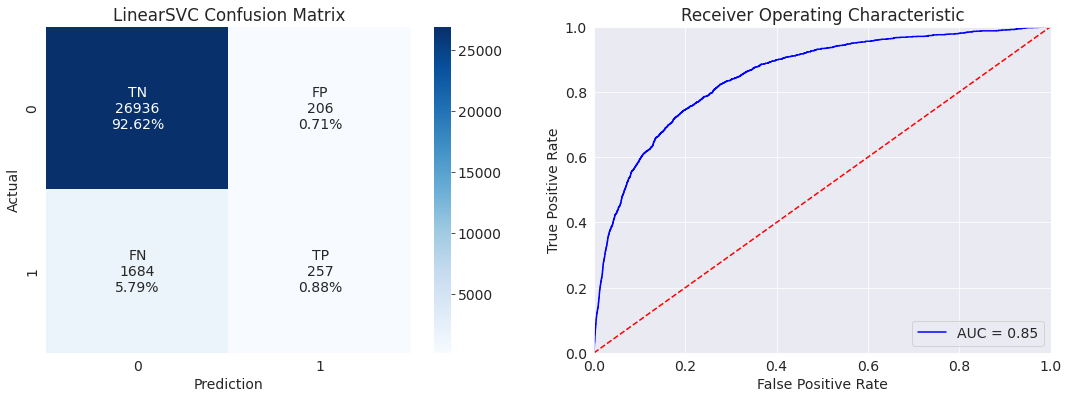

In [ ]:
make_classification_report(linear_SVC,X_val,y_val,record=True)

- The ROC AUC score is similar to Logistic Regression But the Recall and F1-Score are less. Thus the baseline Linear SVC is performing worse than Logistic Regression in our case.

#### K-Nearest Neighbours

<p>K-nearest neighbors is a supervised machine learning algorithm for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-nearest neighbors are used for classification or regression.</p>  
<p>The main idea behind K-NN is to find the K nearest data points, or neighbors, to a given data point and then predict the label or value of the given data point based on the labels or values of its K nearest neighbors.</p>
<p>K can be any positive integer, but in practice, K is often small, such as 3 or 5. The “K” in K-nearest neighbors refers to the number of items that the algorithm uses to make its prediction whether its a classification problem or a regression problem.</p>
<center><img src="https://www.datasciencecentral.com/wp-content/uploads/2021/10/1327962.png" alt="KNN " width="500" height="600"></center>

Once K and distance metric are selected, K-NN algorithm goes through the following steps:
- Calculate distance: The K-NN algorithm calculates the distance between a new data point and all training data points. This is done using the selected distance metric.
- Find nearest neighbors: Once distances are calculated, K-nearest neighbors are determined based on a set value of K.
- Predict target class label: After finding out K nearest neighbors, we can then predict the target class label for a new data point by taking majority vote from its K neighbors (in case of classification) or by taking average from its K neighbors (in case of regression).

Below are the differnt distance functions to calculate the nearest neighbours

![](https://www.saedsayad.com/images/KNN_similarity.png) 


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=32,n_jobs=-1)# Neighbours are randomly picked
KNN_model = score_model(KNN_model,X_train,y_train,record=True)

		KNEIGHBORSCLASSIFIER MODEL

Fold 0 ROC AUC score: 0.83066498
Fold 1 ROC AUC score: 0.82934861
Fold 2 ROC AUC score: 0.83342802
Fold 3 ROC AUC score: 0.82829208
Fold 4 ROC AUC score: 0.82581913

		Training Scores

ROC AUC Score : 89.65%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.665 |      60.943 |   15.721 |     24.995 |


		KNEIGHBORSCLASSIFIER MODEL

ROC AUC Score : 82.75%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.539 |      56.225 |   14.426 |      22.96 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.94 |     0.99 |       0.97 |          27142 |
|       1 |        0.56 |     0.14 |       0.23 |           1941 |




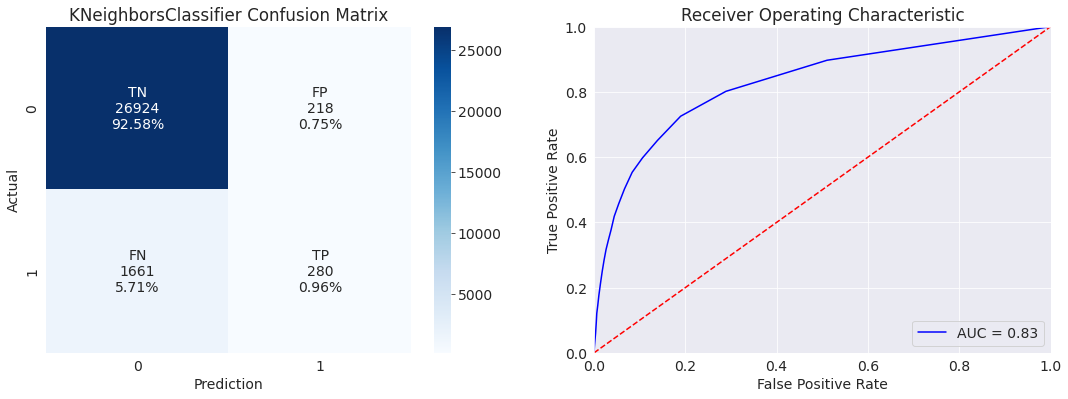

CPU times: user 55.2 s, sys: 241 ms, total: 55.4 s
Wall time: 29.5 s


In [ ]:
%%time
make_classification_report(KNN_model,X_val,y_val,record=True)

- The ROC AUC score of KNN model is 82.75% with n_neighbours=32. we could increase the number of neighbours to get better model.

#### SGDClassifier

<center><strong><h5>Gradient Descent</strong></center>


Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. 
- The general idea is to tweak parameters iteratively in order to minimize the cost function.
- An important parameter of Gradient Descent (GD) is the size of the steps, determined by the learning rate hyperparameters. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time, and if it is too high we may jump the optimal value.

<strong>Note</strong>: When using Gradient Descent, we should ensure that all features have a similar scale (e.g. using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.
 

Types of Gradient Descent: Thereare three types of Gradient Descent:  

- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-batch Gradient Descent

<strong>Stochastic Gradient Descent</strong> 
- The word 'stochastic' means a system or process linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. 

- If the sample size is very large, it becomes computationally very expensive to find the golbal minima over the entire dataset. With SGD a random sample is selected to perform each iteration. This sample is randomly shuffled and selected for performing the iteration. 

![](https://images.deepai.org/glossary-terms/dd6cdd6fcfea4af1a1075aac0b5aa110/sgd.png) 

In SGDClassifier from scikit learn implements regularized linear models with stochastic gradient descent (SGD) learning. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).The various loss function supported are

- 'hinge' gives a linear SVM.

- 'log_loss’ gives logistic regression, a probabilistic classifier.

- 'modified_huber' is another smooth loss that brings tolerance to
outliers as well as probability estimates.

- 'squared_hinge' is like hinge but is quadratically penalized.

- 'perceptron' is the linear loss used by the perceptron algorithm.



In [ ]:
sgd_model = SGDClassifier(loss='modified_huber',n_jobs=-1,random_state=42)
sgd_model = score_model(sgd_model,X_train,y_train,record=True)

		SGDCLASSIFIER MODEL

Fold 0 ROC AUC score: 0.83236120
Fold 1 ROC AUC score: 0.83418850
Fold 2 ROC AUC score: 0.83741301
Fold 3 ROC AUC score: 0.78083818
Fold 4 ROC AUC score: 0.76020063

		Training Scores

ROC AUC Score : 84.19%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.396 |      52.047 |   20.996 |     29.922 |


		SGDCLASSIFIER MODEL

ROC AUC Score : 84.29%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.419 |      51.729 |   20.814 |     29.684 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.95 |     0.99 |       0.97 |          27142 |
|       1 |        0.52 |     0.21 |       0.3  |           1941 |




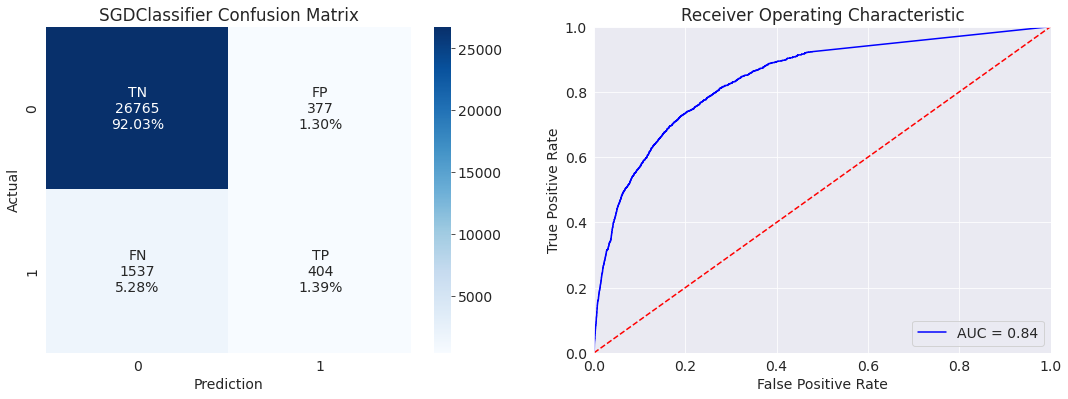

In [ ]:
make_classification_report(sgd_model,X_val,y_val,record=True)

- The Gradient Descent with modified_huber loss is perfoming similar to other linear or distance models. The baseline models are failing to predict the True Positives.

### Tree Based models

- The tree based model are robust to outliers, as our has many outliers we will check how this models perform on our data

#### Decision Tree Classifier

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. A decision tree starts at a single point (or ‘node’) which then branches (or ‘splits’) in two or more directions. Each branch offers different possible outcomes, incorporating a variety of decisions and chance events until a final outcome is achieved. 

<center>
<img src="https://i.imgur.com/4RX9be3.png" width="600" height="400">
</center> 


While there are multiple ways to select the best attribute at each node, two methods, information gain and Gini impurity, act as popular splitting criterion for decision tree models. They help to evaluate the quality of each test condition and how well it will be able to classify samples into a class.  

**Entropy and Information Gain** 

- Entropy is a concept that stems from information theory, which measures the impurity of the sample values. It is defined with by the following formula, where: 

<center>
<img src="https://www.humaneer.org/static/7968dcf20ae9fa961be59cd8bbdf5a24/0d1a4/6003fba5-03fe-45f4-9cb2-acb0231c29e8.png" width="200" height="60">
</center> 
<center>
<table>
<tr><td>S - Set of all instances</td></tr>
<tr><td>N - Number of distinct class values</td></tr>
<tr><td>Pi - Event probablity</td></tr>
<table>
</center> 

- Information gain indicates how much information a particular variable or feature gives us about the final outcome. It can be found out by subtracting the entropy of a particular attribute inside the data set from the entropy of the whole data set.

<center>
<img src="https://www.humaneer.org/static/572ca05e5658d32bc53009f2cd766711/f1c64/cf354c51-a73a-4202-a56f-8b1a82e7136e.png" width="400" height="60">
</center> 

<center>
<table>
<tr><td>H(S) - entropy of whole data set S</td></tr>
<tr><td>|Sj| - number of instances with j value of an attribute A</td></tr>
<tr><td>|S| - total number of instances in the dataset</td></tr>
<tr><td>v - set of distinct values of an attribute A</td></tr>
<tr><td>H(Sj) - entropy of subset of instances for attribute A</td></tr>
<tr><td>H(A, S) - entropy of an attribute A</td></tr>
<table>
</center> 







**Gini Impurity** 

Gini impurity is the probability of incorrectly classifying random data point in the dataset if it were labeled based on the class distribution of the dataset. Similar to entropy, if set, S, is pure—i.e. belonging to one class) then, its impurity is zero. This is denoted by the following formula:  

<center>
<img src="https://static.wixstatic.com/media/02b811_5df05513ffd4487d843bb401dfa5e0cb~mv2.png/v1/fit/w_309%2Ch_118%2Cal_c/file.png" width="200" height="60">
</center> 


<p>The Complex decision trees tend to overfit and do not generalize well to new data. This scenario can be avoided through the processes of pre-pruning or post-pruning. </p>
<p>Small variations within data can produce a very different decision tree. Bagging, or the averaging of estimates, can be a method of reducing variance of decision trees</p>

In [ ]:
dtc_model=DecisionTreeClassifier(random_state=42)
dtc_model = score_model(dtc_model,X_train,y_train,record=True)

		DECISIONTREECLASSIFIER MODEL

Fold 0 ROC AUC score: 0.62004689
Fold 1 ROC AUC score: 0.61853625
Fold 2 ROC AUC score: 0.61458027
Fold 3 ROC AUC score: 0.61667984
Fold 4 ROC AUC score: 0.60198680

		Training Scores

ROC AUC Score : 100.00%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     99.977 |      99.961 |   99.693 |     99.827 |


		DECISIONTREECLASSIFIER MODEL

ROC AUC Score : 61.42%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     89.836 |      26.118 |   28.594 |       27.3 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.95 |     0.94 |       0.95 |          27142 |
|       1 |        0.26 |     0.29 |       0.27 |           1941 |




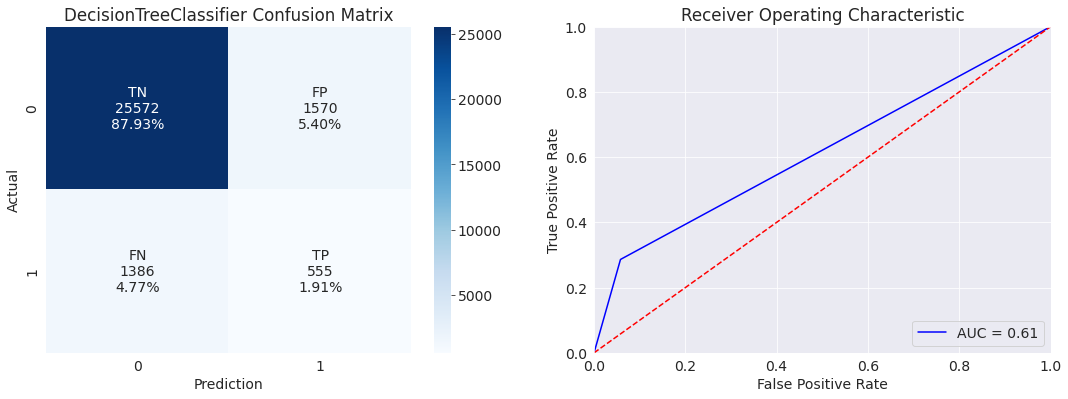

In [ ]:
make_classification_report(dtc_model,X_val,y_val,record=True)

- The ROC AUC score is very low compared to all other models.This is beacuse the Descision Tree is Overfilled to the Train data. This can be handled by pruning, bagging, or boosting methods.

#### Random Forest Classifier

Random Forest Classifier is Ensemble algorithm. Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.  

This works well because a single decision tree may be prone to a noise, but aggregate of many decision trees reduce the effect of noise giving more accurate results. 

![](https://1.cms.s81c.com/sites/default/files/2020-12-07/Random%20Forest%20Diagram.jpg) 


Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems. 
- The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample. 
- Of that training sample, one-third of it is set aside as test data, known as the out-of-bag (oob) sample. 
- Another instance of randomness is then injected through feature bagging, adding more diversity to the dataset and reducing the correlation among decision trees. 
- Depending on the type of problem, the determination of the prediction will vary. For a regression task, the individual decision trees will be averaged, and for a classification task, a majority vote—i.e. the most frequent categorical variable—will yield the predicted class. 
- Finally, the oob sample is then used for cross-validation, finalizing that prediction.

In [ ]:
%%time
rf_model = RandomForestClassifier(random_state=42)
rf_model = score_model(rf_model,X_train,y_train,record=True)

		RANDOMFORESTCLASSIFIER MODEL

Fold 0 ROC AUC score: 0.84729883
Fold 1 ROC AUC score: 0.84889372
Fold 2 ROC AUC score: 0.84524651
Fold 3 ROC AUC score: 0.84720337
Fold 4 ROC AUC score: 0.83558939

		Training Scores

ROC AUC Score : 100.00%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     99.972 |      99.859 |   99.731 |     99.795 |
CPU times: user 2min 20s, sys: 491 ms, total: 2min 21s
Wall time: 2min 20s


		RANDOMFORESTCLASSIFIER MODEL

ROC AUC Score : 83.87%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.512 |      54.079 |   18.444 |     27.507 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.94 |     0.99 |       0.97 |          27142 |
|       1 |        0.54 |     0.18 |       0.28 |           1941 |




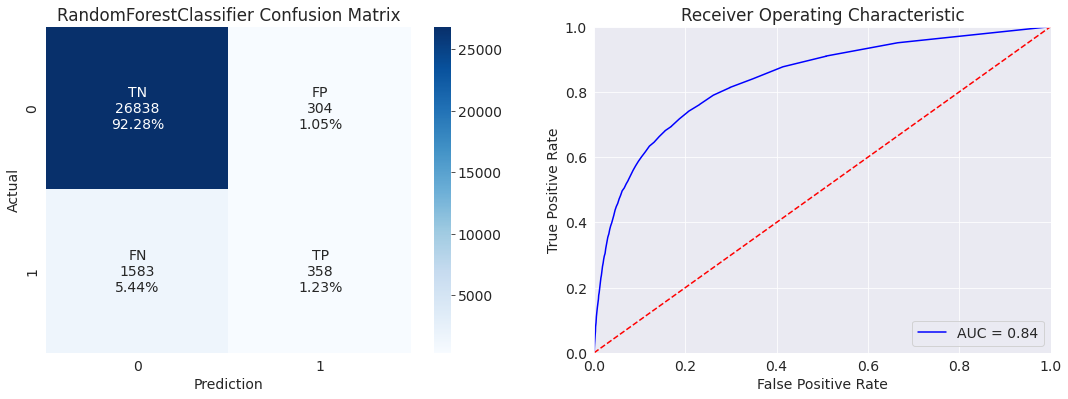

CPU times: user 2.38 s, sys: 97.6 ms, total: 2.48 s
Wall time: 2.38 s


In [ ]:
%%time
make_classification_report(rf_model,X_val,y_val,record=True)

- The Random Forest Model out performs Descision Tree Model. But the results are similar to Linear or distance based models. we can tune Hyperparameters to improve the model performance.

#### Gradient Boosting Machines(XGBoost)

XgBoost stands for Extreme Gradient Boosting.It implements machine learning algorithms under the Gradient Boosting framework. 

- In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. 
- Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. 
- The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model.
- It can work on regression, classification, ranking, and user-defined prediction problems. 

![](https://miro.medium.com/max/809/1*ozf-ftCx-jy2jII4cEv9YA.png)

In [ ]:
%%time
xgb_model = XGBClassifier(random_state=42)
xgb_model = score_model(xgb_model,X_train,y_train,record=True)

		XGBCLASSIFIER MODEL

Fold 0 ROC AUC score: 0.86991549
Fold 1 ROC AUC score: 0.86902453
Fold 2 ROC AUC score: 0.87159435
Fold 3 ROC AUC score: 0.86388831
Fold 4 ROC AUC score: 0.85727383

		Training Scores

ROC AUC Score : 87.20%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.781 |      61.356 |   19.921 |     30.076 |
CPU times: user 40.8 s, sys: 176 ms, total: 40.9 s
Wall time: 41.1 s


		XGBCLASSIFIER MODEL

ROC AUC Score : 86.31%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.666 |      58.491 |   17.568 |     27.021 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.94 |     0.99 |       0.97 |          27142 |
|       1 |        0.58 |     0.18 |       0.27 |           1941 |




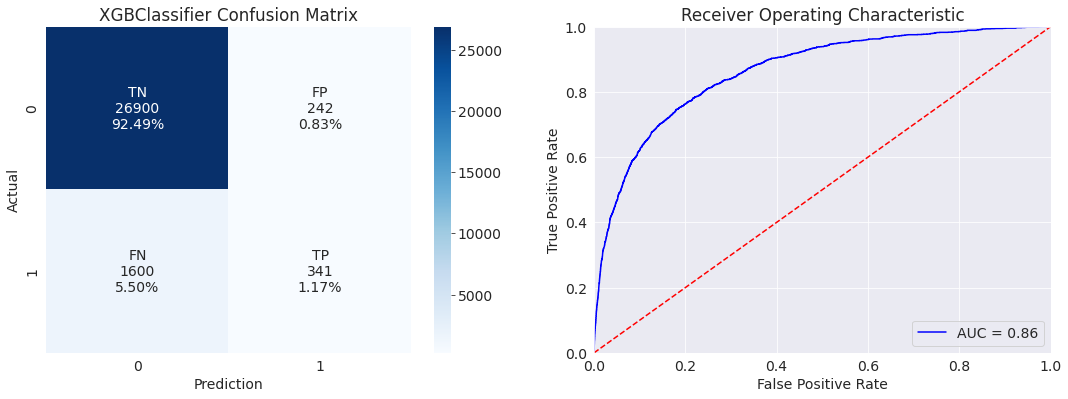

In [ ]:
make_classification_report(xgb_model,X_val,y_val,record=True)

- The ROC AUC score of XGBoost is higher than all the models we trained. we will Tune the Hyperparameters for this to improve the Recall and F1-score.

#### LightBoost

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel, distributed, and GPU learning.
- Capable of handling large-scale data. 

LightGBM uses histogram-based algorithms, which bucket continuous feature (attribute) values into discrete bins. This speeds up training and reduces memory usage. 

LightGBM grows trees leaf-wise (best-first). It will choose the leaf with max delta loss to grow. Holding #leaf fixed, leaf-wise algorithms tend to achieve lower loss than level-wise algorithms.
![](https://lightgbm.readthedocs.io/en/latest/_images/leaf-wise.png)

Leaf-wise may cause over-fitting when #data is small, so LightGBM includes the max_depth parameter to limit tree depth. However, trees still grow leaf-wise even when max_depth is specified. 


In [ ]:
lb_model = lgb.LGBMClassifier(random_state=42)
lb_model = score_model(lb_model,X_train,y_train,record=False)

		LGBMCLASSIFIER MODEL

Fold 0 ROC AUC score: 0.86896534
Fold 1 ROC AUC score: 0.86820124
Fold 2 ROC AUC score: 0.87142016
Fold 3 ROC AUC score: 0.86520337
Fold 4 ROC AUC score: 0.85588668

		Training Scores

ROC AUC Score : 89.76%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     94.223 |      71.217 |   23.441 |     35.273 |


		LGBMCLASSIFIER MODEL

ROC AUC Score : 86.29%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.718 |      59.344 |    18.65 |     28.381 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.94 |     0.99 |       0.97 |          27142 |
|       1 |        0.59 |     0.19 |       0.28 |           1941 |




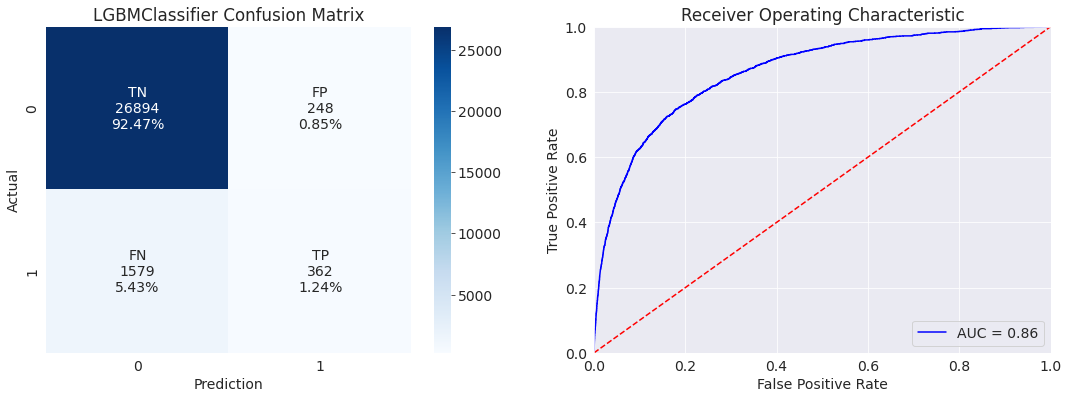

In [ ]:
make_classification_report(lb_model,X_val,y_val,record=False)

- The LGBM model is similar to XG Boost but it has higher Recall and F1-Score. We will also Perform Hyperpamater Tuning to improve this model.

### HyperParameter Tuning

We will Tune the Hyperparameters to improve the model's performance with overfitting to the Traing dataset. 
![](https://i.imgur.com/EJCrSZw.png)

#### LGBMClassifier

The Hyperparamer Tuning suggestions from LightGBM

For Better Accuracy
- Use large max_bin (may be slower)
- Use small learning_rate with large num_iterations
- Use large num_leaves (may cause over-fitting)
- Use bigger training data
- Try dart

Deal with Over-fitting 
- Use small max_bin
- Use small num_leaves
- Use min_data_in_leaf and min_sum_hessian_in_leaf
- Use bagging by set bagging_fraction and bagging_freq
- Use feature sub-sampling by set feature_fraction
- Use bigger training data
- Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
- Try max_depth to avoid growing deep tree
- Try extra_trees
- Try increasing path_smooth

In [ ]:
lb_model

LGBMClassifier(random_state=42)

In [ ]:
lb_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

- We will tune the hyperparametes to reduce the error with out overfitting the model to the training set

In [ ]:
initial_params = {
    "random_state":42,
    "n_jobs":-1
}



> **Parameter : max_depth**



CPU times: user 36 s, sys: 284 ms, total: 36.3 s
Wall time: 19.5 s


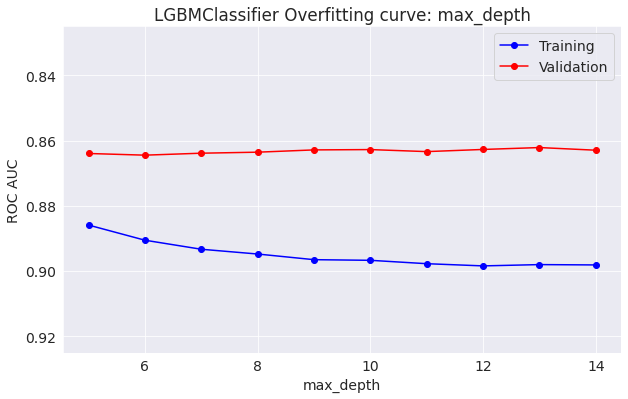

In [ ]:
%%time
test_param_and_plot(lgb.LGBMClassifier,"max_depth",list(np.arange(5,15,1)),**initial_params)

- The best score is observed at max depth 5-6



> **Parameter : n_estimators**



CPU times: user 3min, sys: 1.21 s, total: 3min 1s
Wall time: 1min 45s


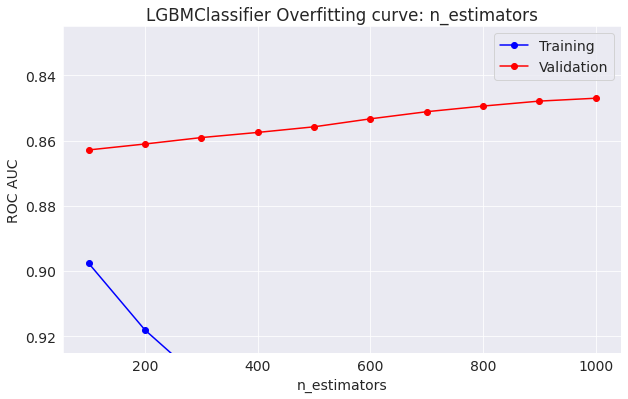

In [ ]:
%%time
test_param_and_plot(lgb.LGBMClassifier,"n_estimators",list(np.arange(100,1001,100)),**initial_params)

- The best score is observed at the 100-200, but we can check again in randmised search cv



> **Parameter : learning_rate**



CPU times: user 15.1 s, sys: 104 ms, total: 15.2 s
Wall time: 8.12 s


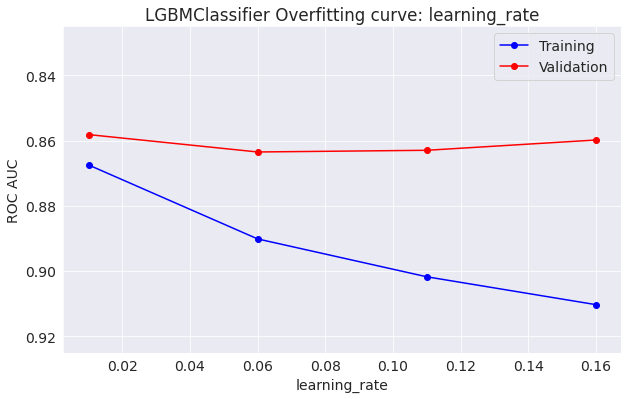

In [ ]:
%%time
test_param_and_plot(lgb.LGBMClassifier,"learning_rate",list(np.arange(0.01,0.2,0.05)),**initial_params)

- The best score is observed at 0.06 learning rate



> **Parameter : colsample_bytree**



CPU times: user 30.2 s, sys: 227 ms, total: 30.4 s
Wall time: 16.3 s


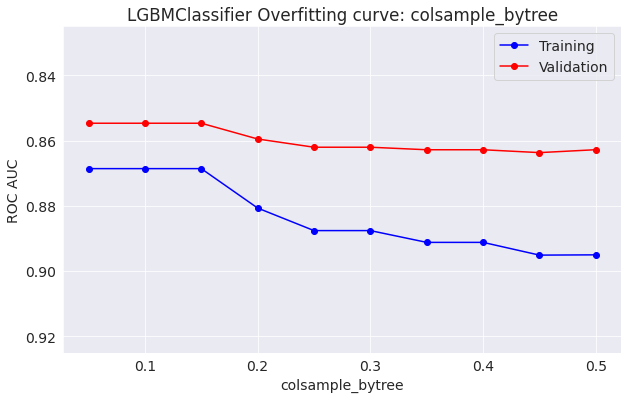

In [ ]:
%%time
test_param_and_plot(lgb.LGBMClassifier,"colsample_bytree",list(np.arange(0.05,0.51,0.05)),**initial_params)

- The best score is observed at 0.25



> **Parameter : min_child_weight**



CPU times: user 29.7 s, sys: 172 ms, total: 29.9 s
Wall time: 15.9 s


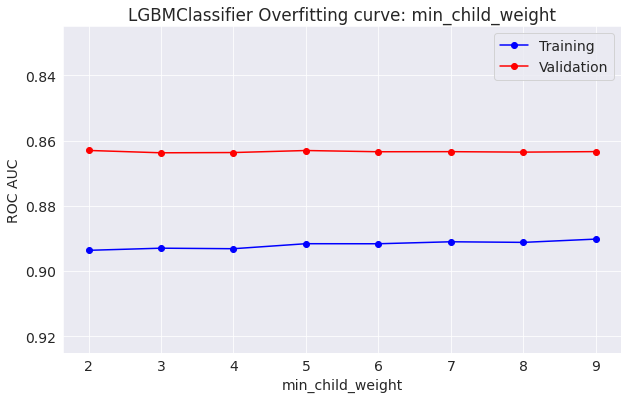

In [ ]:
%%time
test_param_and_plot(lgb.LGBMClassifier,"min_child_weight",list(np.arange(2,10,1)),**initial_params)

- The best score is observed near 4



> **Parameter : subsample**



CPU times: user 36.1 s, sys: 237 ms, total: 36.4 s
Wall time: 19.4 s


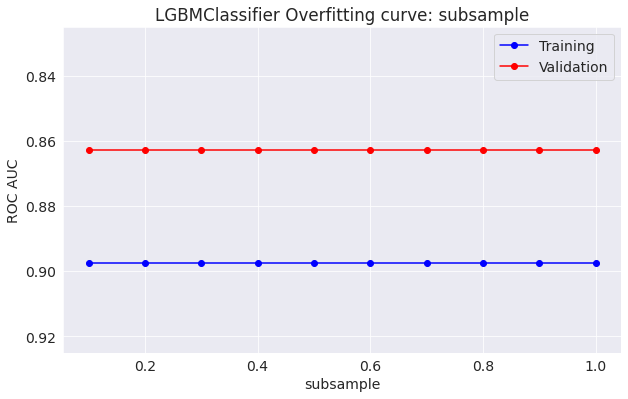

In [ ]:
%%time
test_param_and_plot(lgb.LGBMClassifier,"subsample",list(np.arange(0.1,1.1,0.1)),**initial_params)

- No visibible change 



> **Parameter: min_split_gain**

CPU times: user 35.9 s, sys: 294 ms, total: 36.1 s
Wall time: 23.8 s


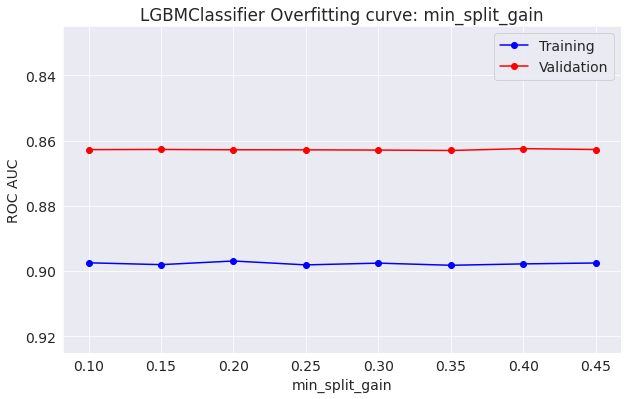

In [ ]:
%%time
test_param_and_plot(lgb.LGBMClassifier,"min_split_gain",list(np.arange(0.1,0.5,0.05)),**initial_params)

- The best score is observed near 0.2 ~ 0.25



> **Parameter : min_data_in_leaf**



CPU times: user 39.8 s, sys: 271 ms, total: 40.1 s
Wall time: 21.3 s


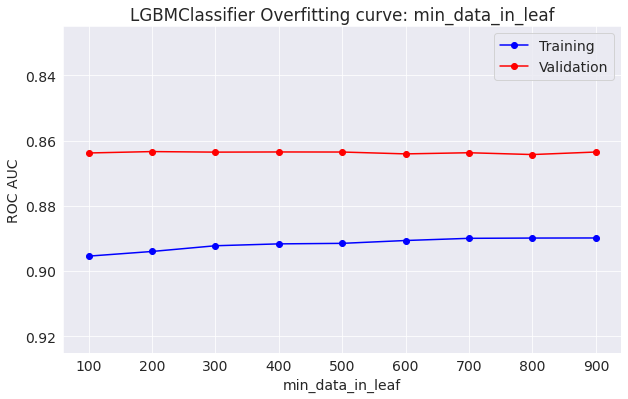

In [ ]:
%%time
test_param_and_plot(lgb.LGBMClassifier,"min_data_in_leaf",list(np.arange(100,1000,100)),**initial_params)

- The best score is observed at 600



> **Parameter : boosting_type**


CPU times: user 18.9 s, sys: 80.6 ms, total: 19 s
Wall time: 9.96 s


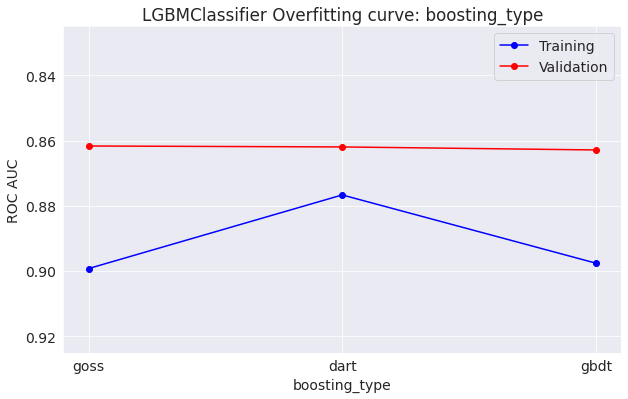

In [ ]:
%%time
test_param_and_plot(lgb.LGBMClassifier,"boosting_type",["goss","dart","gbdt"],**initial_params)

Now We will use Randomised search CV to find the estimate best params combinations

In [ ]:
lgbm_rscv_params = {'boosting_type': ["dart","gbdt"],
          'min_data_in_leaf' : [550,600,650],
          'min_split_gain': [0.2,0.225,0.25],
          'min_child_weight':[3,4,5],
          'learning_rate' : [0.055,0.06,0.065],
          'max_depth': [4,5,6,7],
          'colsample_bytree': [0.2,0.25,0.3],
          'n_estimators': [100,200,500,750],
 }
lgbm_model = lgb.LGBMClassifier(random_state=42,n_jobs=-1)


In [ ]:
lgbm_rscv_model = RandomizedSearchCV(estimator = lgbm_model,
                                      param_distributions=lgbm_rscv_params,
                                      n_iter=50,
                                      cv=3,
                                      scoring= 'roc_auc',
                                      verbose=2)

In [ ]:
%%time
lgbm_rscv_model.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END boosting_type=dart, colsample_bytree=0.2, learning_rate=0.065, max_depth=5, min_child_weight=3, min_data_in_leaf=550, min_split_gain=0.225, n_estimators=100; total time=   2.7s
[CV] END boosting_type=dart, colsample_bytree=0.2, learning_rate=0.065, max_depth=5, min_child_weight=3, min_data_in_leaf=550, min_split_gain=0.225, n_estimators=100; total time=   2.6s
[CV] END boosting_type=dart, colsample_bytree=0.2, learning_rate=0.065, max_depth=5, min_child_weight=3, min_data_in_leaf=550, min_split_gain=0.225, n_estimators=100; total time=   2.6s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.065, max_depth=7, min_child_weight=4, min_data_in_leaf=650, min_split_gain=0.225, n_estimators=100; total time=   3.2s
[CV] END boosting_type=dart, colsample_bytree=0.25, learning_rate=0.065, max_depth=7, min_child_weight=4, min_data_in_leaf=650, min_split_gain=0.225, n_estimators=100; total time=   3.2s
[CV] E

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_iter=50,
                   param_distributions={'boosting_type': ['dart', 'gbdt'],
                                        'colsample_bytree': [0.2, 0.25, 0.3],
                                        'learning_rate': [0.055, 0.06, 0.065],
                                        'max_depth': [4, 5, 6, 7],
                                        'min_child_weight': [3, 4, 5],
                                        'min_data_in_leaf': [550, 600, 650],
                                        'min_split_gain': [0.2, 0.225, 0.25],
                                        'n_estimators': [100, 200, 500, 750]},
                   scoring='roc_auc', verbose=2)

In [ ]:
best_rscv_params = lgbm_rscv_model.best_params_
best_rscv_params

{'n_estimators': 750,
 'min_split_gain': 0.225,
 'min_data_in_leaf': 650,
 'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.055,
 'colsample_bytree': 0.3,
 'boosting_type': 'dart'}

In [ ]:
lgbm_rscv_model.best_score_

0.8666334166650046

In [ ]:
with open('/content/drive/MyDrive/data/best_rscv.json', 'w') as f:
    json.dump(best_rscv_params, f)

with open('/content/drive/MyDrive/data/best_rscv.json') as f:
    best_rscv_params = json.load(f)
best_rscv_params

{'n_estimators': 750,
 'min_split_gain': 0.225,
 'min_data_in_leaf': 650,
 'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.055,
 'colsample_bytree': 0.3,
 'boosting_type': 'dart'}

		LIGHTBOOST BEST MODEL

ROC AUC Score : 86.28%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     93.725 |      60.069 |   17.826 |     27.493 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.94 |     0.99 |       0.97 |          27142 |
|       1 |        0.6  |     0.18 |       0.27 |           1941 |




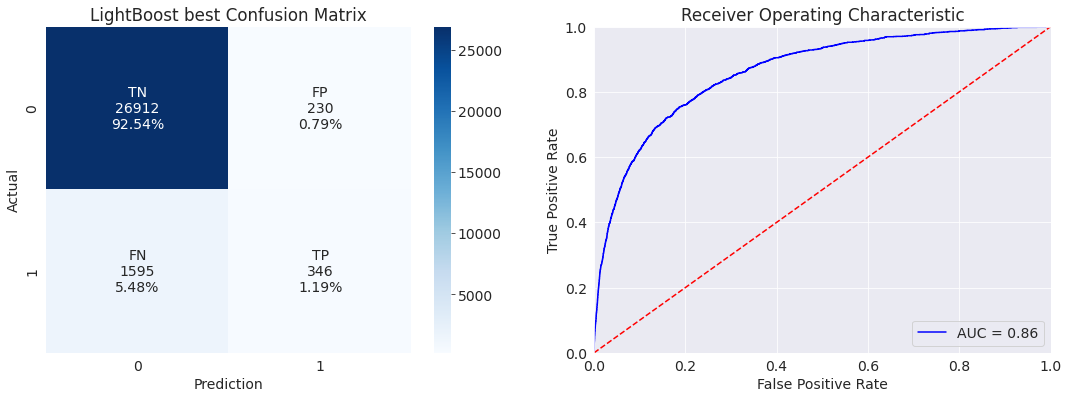

In [ ]:
make_classification_report(lgbm_rscv_model.best_estimator_,X_val,y_val,"LightBoost best")

- The Hyperparameters from the Randomised search CV are performing similar to our baseline model. we will fine tune this Hyperparameters using Grid Search CV to get the best Hyperparameters.

In [ ]:
lgbm_grid_params = {
    'boosting_type': ["dart"],
    'min_data_in_leaf' : [650,700],
    'min_split_gain': [0.225],
    'min_child_weight':[6],
    'learning_rate' : [0.05,0.055],
    'max_depth': [3,4],
    'colsample_bytree': [0.4],
    'n_estimators': [750,1000],
    'class_weight': ['balanced']
}

In [ ]:
lgbm_grid_model = GridSearchCV(estimator = lgbm_model,
                                      param_grid=lgbm_grid_params,
                                      cv=3,
                                      scoring= 'roc_auc',
                                      verbose=2)

In [ ]:
%%time
lgbm_grid_model.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END boosting_type=dart, class_weight=balanced, colsample_bytree=0.4, learning_rate=0.05, max_depth=3, min_child_weight=6, min_data_in_leaf=650, min_split_gain=0.225, n_estimators=750; total time=  59.1s
[CV] END boosting_type=dart, class_weight=balanced, colsample_bytree=0.4, learning_rate=0.05, max_depth=3, min_child_weight=6, min_data_in_leaf=650, min_split_gain=0.225, n_estimators=750; total time=  53.2s
[CV] END boosting_type=dart, class_weight=balanced, colsample_bytree=0.4, learning_rate=0.05, max_depth=3, min_child_weight=6, min_data_in_leaf=650, min_split_gain=0.225, n_estimators=750; total time=  52.5s
[CV] END boosting_type=dart, class_weight=balanced, colsample_bytree=0.4, learning_rate=0.05, max_depth=3, min_child_weight=6, min_data_in_leaf=650, min_split_gain=0.225, n_estimators=1000; total time= 1.4min
[CV] END boosting_type=dart, class_weight=balanced, colsample_bytree=0.4, learning_rate=0.05, max_depth=3,

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42),
             param_grid={'boosting_type': ['dart'],
                         'class_weight': ['balanced'],
                         'colsample_bytree': [0.4],
                         'learning_rate': [0.05, 0.055], 'max_depth': [3, 4],
                         'min_child_weight': [6],
                         'min_data_in_leaf': [650, 700],
                         'min_split_gain': [0.225],
                         'n_estimators': [750, 1000]},
             scoring='roc_auc', verbose=2)

In [ ]:
best_grid_params = lgbm_grid_model.best_params_
best_grid_params.update(initial_params)
best_grid_params

{'boosting_type': 'dart',
 'class_weight': 'balanced',
 'colsample_bytree': 0.4,
 'learning_rate': 0.055,
 'max_depth': 3,
 'min_child_weight': 6,
 'min_data_in_leaf': 650,
 'min_split_gain': 0.225,
 'n_estimators': 1000,
 'random_state': 42,
 'n_jobs': -1}

In [ ]:
lgbm_grid_model.best_score_

0.8671025918785934

In [ ]:
with open('/content/drive/MyDrive/data/best_grid.json', 'w') as f:
    json.dump(best_grid_params, f)

with open('/content/drive/MyDrive/data/best_grid.json') as f:
    best_grid_params = json.load(f)
best_grid_params

{'boosting_type': 'dart',
 'class_weight': 'balanced',
 'colsample_bytree': 0.4,
 'learning_rate': 0.055,
 'max_depth': 3,
 'min_child_weight': 6,
 'min_data_in_leaf': 650,
 'min_split_gain': 0.225,
 'n_estimators': 1000,
 'random_state': 42,
 'n_jobs': -1}

In [ ]:
lgbm_final_model = lgb.LGBMClassifier(**best_grid_params)
lgbm_final_model = score_model(lgbm_final_model,X_train,y_train,"LGBM Final Model",record=True)

		LGBM FINAL MODEL MODEL

Fold 0 ROC AUC score: 0.87065914
Fold 1 ROC AUC score: 0.86906991
Fold 2 ROC AUC score: 0.87334184
Fold 3 ROC AUC score: 0.86502656
Fold 4 ROC AUC score: 0.85808482

		Training Scores

ROC AUC Score : 87.31%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     80.179 |      22.237 |   78.172 |     34.624 |


		LGBM FINAL MODEL MODEL

ROC AUC Score : 86.32%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     79.761 |      21.442 |   76.301 |     33.476 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.98 |     0.8  |       0.88 |          27142 |
|       1 |        0.21 |     0.76 |       0.33 |           1941 |




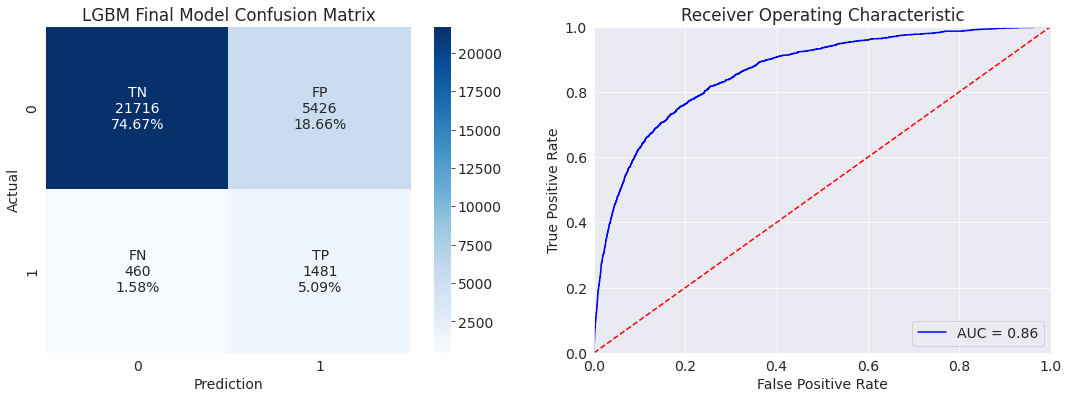

In [ ]:
make_classification_report(lgbm_final_model,X_val,y_val,"LGBM Final Model Validation",record=True)

- The ROC AUC score of the model with best parameters from grid search CV is similar to baseline, But the Recall and F1-score of this model is very high compared to the basline model. Thus we can conclude that it is predicting the True Positives much better than any other model we have trained.

In [ ]:
lgbm_feature_importance = lgbm_final_model.feature_importances_
lgbm_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm_feature_importance
}).sort_values('Importance', ascending=False)
lgbm_feature_importance_df

,Feature,Importance
0,RevolvingUtilizationOfUnsecuredLines,1130
2,NumberOfTime30-59DaysPastDueNotWorse,878
6,NumberOfTimes90DaysLate,673
5,NumberOfOpenCreditLinesAndLoans,637
3,DebtRatio,579
8,NumberOfTime60-89DaysPastDueNotWorse,567
4,MonthlyIncome,539
1,age,497
10,MonthlyDebt,479
7,NumberRealEstateLoansOrLines,466


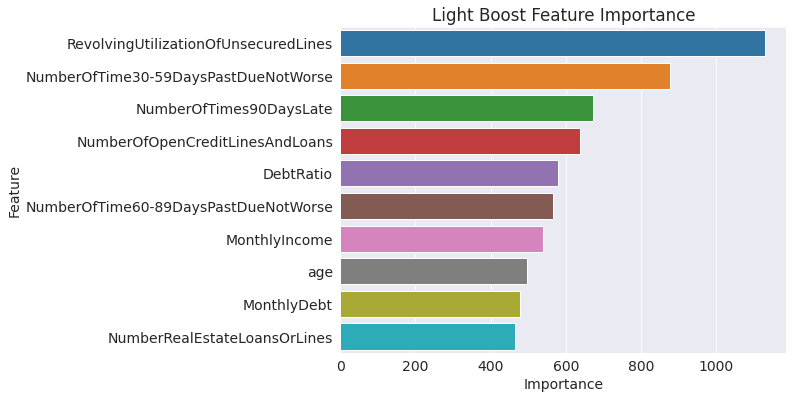

In [ ]:
plt.title('Light Boost Feature Importance')
sns.barplot(data=lgbm_feature_importance_df.head(10), x='Importance', y='Feature');

- RevolvingUtilizationOfUnsecuredLines is highly effecting the model performance followed by historical Late payment features.

#### Submitting LGBM best model

In [ ]:
make_submission_file(lgbm_final_model,"Lgbm_best")

'Lgbm_best.csv is created.'

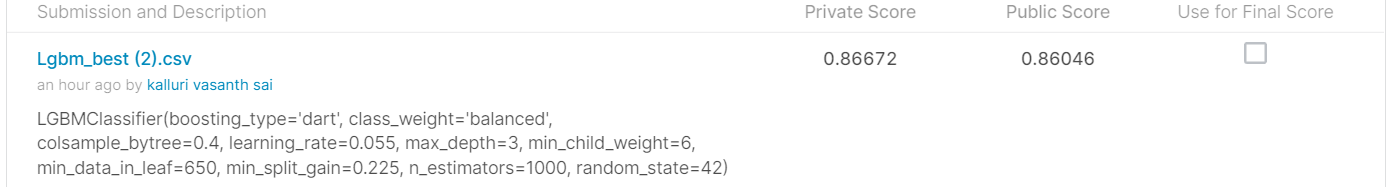

Submitting test output to kaggle, the LGBM AUCROC for the test results were 0.86672 On the private leaderboard, this would be position **132 / 924 (top 14%)**. 

#### XG-Boost 

- We will Tune the Hyperparameters for the XG boost from [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html?highlight=XGBClassifier#xgboost.XGBClassifier)

In [ ]:
%%time
xgb_model = XGBClassifier(random_state=42)

CPU times: user 50 µs, sys: 0 ns, total: 50 µs
Wall time: 58.4 µs


In [ ]:
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
initial_params = {
    "random_state":42,
    "n_jobs":-1
}



> <strong>Parameter : max_depth </strong>



CPU times: user 5min 16s, sys: 618 ms, total: 5min 17s
Wall time: 5min 18s


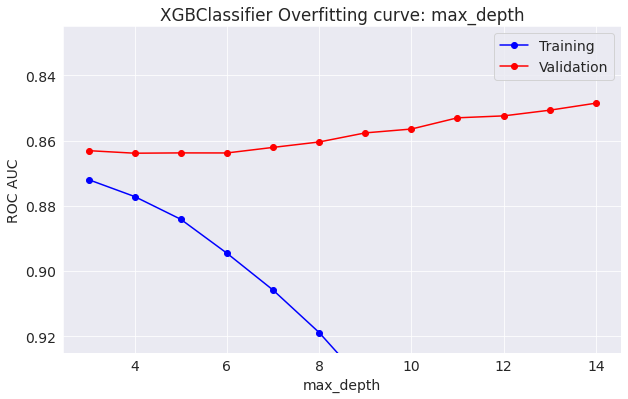

In [ ]:
%%time
test_param_and_plot(XGBClassifier,"max_depth",list(np.arange(3,15,1)),**initial_params)



> **Parameter : learning_rate**



CPU times: user 1min 23s, sys: 167 ms, total: 1min 23s
Wall time: 1min 24s


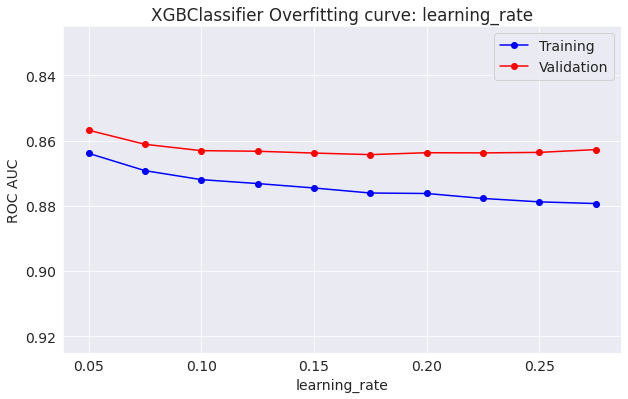

In [ ]:
%%time
test_param_and_plot(XGBClassifier,"learning_rate",list(np.arange(0.05,0.3,0.025)),**initial_params)



> **Parameter : colsample_bytree**



CPU times: user 32.3 s, sys: 76.4 ms, total: 32.3 s
Wall time: 32.4 s


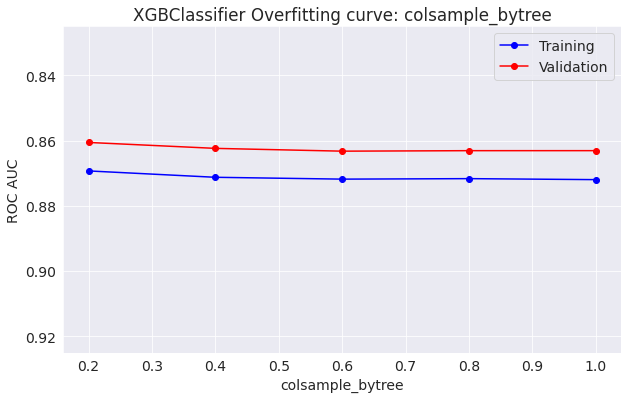

In [ ]:
%%time
test_param_and_plot(XGBClassifier,"colsample_bytree",list(np.arange(0.2,1.1,0.2)),**initial_params)



> **Parameter : n_estimators**



CPU times: user 10min 35s, sys: 1.18 s, total: 10min 36s
Wall time: 10min 37s


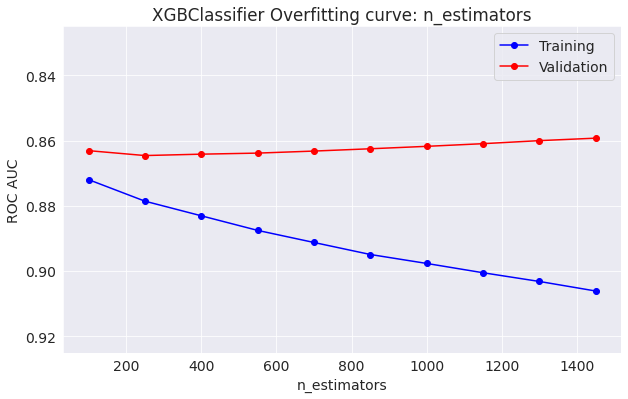

In [ ]:
%%time
test_param_and_plot(XGBClassifier,"n_estimators",list(np.arange(100,1551,150)),**initial_params)



> **Parameter : gamma**



CPU times: user 1min 39s, sys: 331 ms, total: 1min 40s
Wall time: 1min 59s


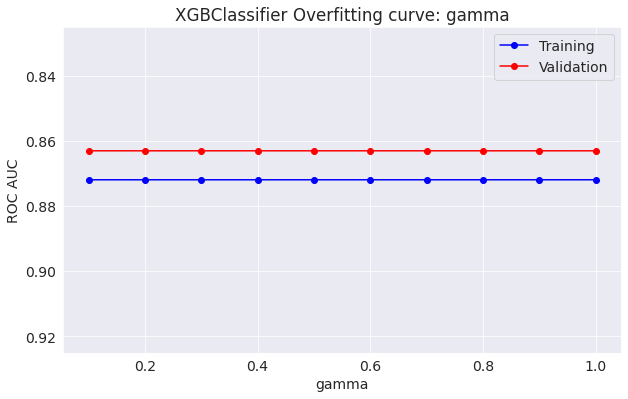

In [ ]:
%%time
test_param_and_plot(XGBClassifier,"gamma",list(np.arange(0.1,1.1,0.1)),**initial_params)



> **Parameter : subsample**



CPU times: user 1min 26s, sys: 218 ms, total: 1min 26s
Wall time: 1min 26s


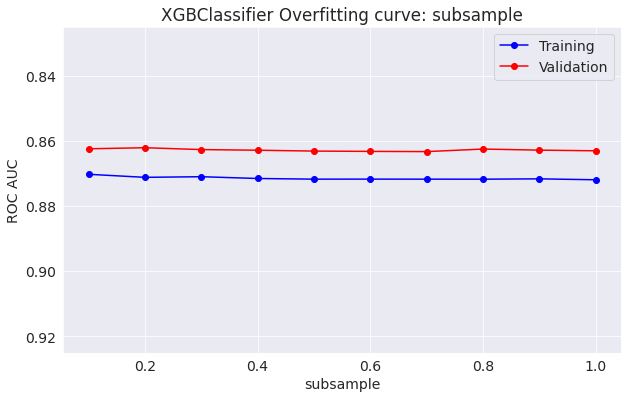

In [ ]:
%%time
test_param_and_plot(XGBClassifier,"subsample",list(np.arange(0.1,1.1,0.1)),**initial_params)



> **Parameter : booster**



CPU times: user 33.1 s, sys: 76.4 ms, total: 33.2 s
Wall time: 33.4 s


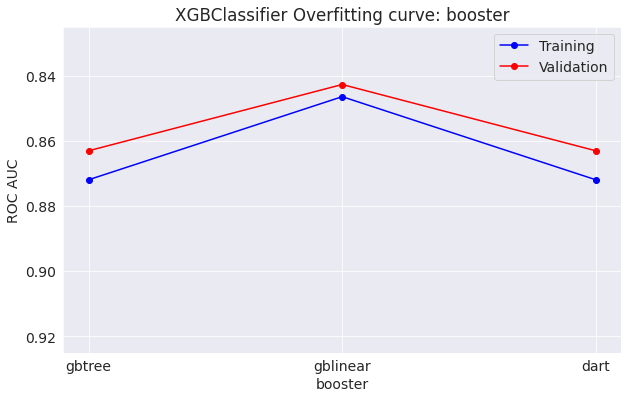

In [ ]:
%%time
test_param_and_plot(XGBClassifier,"booster",["gbtree", "gblinear" ,"dart"],**initial_params)



> **Parameter : scale_pos_weight**



CPU times: user 1min 37s, sys: 258 ms, total: 1min 38s
Wall time: 1min 39s


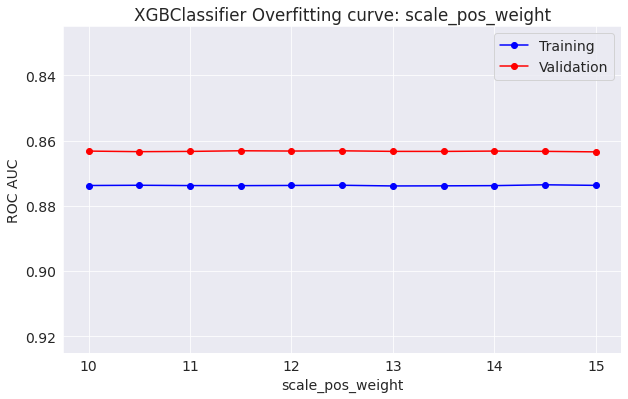

In [ ]:
%%time
test_param_and_plot(XGBClassifier,'scale_pos_weight',list(np.arange(10,15.1,0.5)),**initial_params)

In [ ]:
xgb_rscv_Parameters = {
    'max_depth' : [3,4,5,6],
    'learning_rate':[0.1,0.15,0.175],
    'colsample_bytree' : [0.4,0.6,0.8,1.0],
    'n_estimators' : [150,250,500,750],
    'gamma':[0.25,0.5],
    'subsample': [0.6,0.7,0.8,1],
    'scale_pos_weight': [12.5,13.5,14],  ### Ratio of negative to positive class   
}
xgb_model = XGBClassifier(random_state=42,n_jobs=-1)

In [ ]:
xgb_rscv_model = RandomizedSearchCV(estimator = xgb_model,
                                      param_distributions=xgb_rscv_Parameters,
                                      n_iter=50,
                                      cv=3,
                                      scoring= 'roc_auc',
                                      verbose=2)

In [ ]:
%%time
xgb_rscv_model.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=1.0, gamma=0.25, learning_rate=0.15, max_depth=5, n_estimators=500, scale_pos_weight=12.5, subsample=0.7; total time=  48.3s
[CV] END colsample_bytree=1.0, gamma=0.25, learning_rate=0.15, max_depth=5, n_estimators=500, scale_pos_weight=12.5, subsample=0.7; total time=  48.1s
[CV] END colsample_bytree=1.0, gamma=0.25, learning_rate=0.15, max_depth=5, n_estimators=500, scale_pos_weight=12.5, subsample=0.7; total time=  47.5s
[CV] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, scale_pos_weight=12.5, subsample=0.7; total time=   5.4s
[CV] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, scale_pos_weight=12.5, subsample=0.7; total time=   5.5s
[CV] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, scale_pos_weight=12.5, subsample=0.7; total time=   5.5s
[CV] END colsample_bytree=0.6, gamma=0

RandomizedSearchCV(cv=3, estimator=XGBClassifier(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.4, 0.6, 0.8,
                                                             1.0],
                                        'gamma': [0.25, 0.5],
                                        'learning_rate': [0.1, 0.15, 0.175],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [150, 250, 500, 750],
                                        'scale_pos_weight': [12.5, 13.5, 14],
                                        'subsample': [0.6, 0.7, 0.8, 1]},
                   scoring='roc_auc', verbose=2)

In [ ]:
best_xgb_rscv_params = xgb_rscv_model.best_params_
best_xgb_rscv_params

{'subsample': 1,
 'scale_pos_weight': 13.5,
 'n_estimators': 150,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

In [ ]:
xgb_rscv_model.best_score_

0.8669567667000614

In [ ]:
with open('/content/drive/MyDrive/data/best_xgb_rscv.json', 'w') as f:
    json.dump(best_xgb_rscv_params, f)

with open('/content/drive/MyDrive/data/best_xgb_rscv.json') as f:
    best_xgb_rscv_params = json.load(f)
best_xgb_rscv_params

{'subsample': 1,
 'scale_pos_weight': 13.5,
 'n_estimators': 150,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

		LIGHTBOOST RCV BEST MODEL

ROC AUC Score : 86.43%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|     80.074 |      21.637 |   75.734 |     33.658 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.98 |     0.8  |       0.88 |          27142 |
|       1 |        0.22 |     0.76 |       0.34 |           1941 |




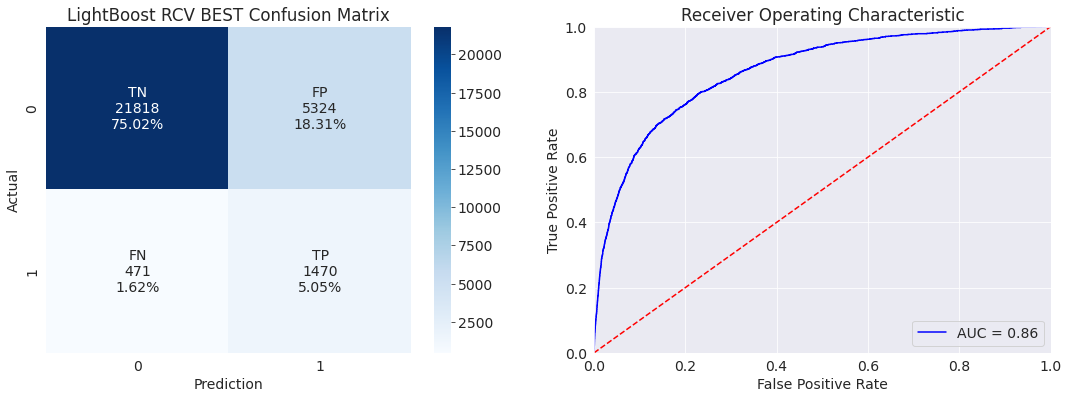

In [ ]:
make_classification_report(xgb_rscv_model.best_estimator_,X_val,y_val,"LightBoost RCV BEST")

- The AUCROC of the XGBoost is better than baseline with higher Recall and F1-score.

In [ ]:
best_xgb_rscv_params

{'subsample': 1,
 'scale_pos_weight': 13.5,
 'n_estimators': 150,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

In [ ]:
xgb_grid_params = {
    'subsample': [0.8,1],
    'scale_pos_weight' : [13.5],
    'n_estimators': [150,500,1000],
    'max_depth' :[3,4],
    'learning_rate' : [0.05,0.1],
    'gamma': [0.5],
    'colsample_bytree': [0.6]
}

In [ ]:
xgb_grid_model = GridSearchCV(estimator = xgb_model,
                                      param_grid=xgb_grid_params,
                                      cv=3,
                                      scoring= 'roc_auc',
                                      verbose=2)

In [ ]:
%%time
xgb_grid_model.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=150, scale_pos_weight=13.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=150, scale_pos_weight=13.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=150, scale_pos_weight=13.5, subsample=0.8; total time=   6.7s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=150, scale_pos_weight=13.5, subsample=1; total time=   6.4s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=150, scale_pos_weight=13.5, subsample=1; total time=   6.3s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, n_estimators=150, scale_pos_weight=13.5, subsample=1; total time=   6.3s
[CV] END colsample_bytree=0.6, gamma=0.5, lea

GridSearchCV(cv=3, estimator=XGBClassifier(n_jobs=-1, random_state=42),
             param_grid={'colsample_bytree': [0.6], 'gamma': [0.5],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 4],
                         'n_estimators': [150, 500, 1000],
                         'scale_pos_weight': [13.5], 'subsample': [0.8, 1]},
             scoring='roc_auc', verbose=2)

In [ ]:
best_xgb_grid_params = xgb_grid_model.best_params_
best_xgb_grid_params.update(initial_params)
best_xgb_grid_params

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 500,
 'scale_pos_weight': 13.5,
 'subsample': 0.8,
 'random_state': 42,
 'n_jobs': -1}

In [ ]:
xgb_grid_model.best_score_

0.8670099808859665

In [ ]:
with open('/content/drive/MyDrive/data/best_xgb_grid.json', 'w') as f:
    json.dump(best_xgb_grid_params, f)

with open('/content/drive/MyDrive/data/best_xgb_grid.json') as f:
    best_xgb_grid_params = json.load(f)
best_xgb_grid_params

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 500,
 'scale_pos_weight': 13.5,
 'subsample': 0.8,
 'random_state': 42,
 'n_jobs': -1}

In [ ]:
xgb_final_model = XGBClassifier(**best_xgb_grid_params)
xgb_final_model = score_model(xgb_final_model,X_train,y_train,"XG Boost Final Model",record=True)

		XG BOOST FINAL MODEL MODEL

Fold 0 ROC AUC score: 0.86972467
Fold 1 ROC AUC score: 0.86969395
Fold 2 ROC AUC score: 0.87290681
Fold 3 ROC AUC score: 0.86517378
Fold 4 ROC AUC score: 0.85838516

		Training Scores

ROC AUC Score : 88.25%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|      80.86 |      23.047 |   79.119 |     35.696 |


		XG BOOST FINAL MODEL VALIDATION MODEL

ROC AUC Score : 86.44%

|   Accuracy |   Precision |   Recall |   F1_Score |
|-----------:|------------:|---------:|-----------:|
|      80.36 |      21.946 |   75.992 |     34.057 |


|   class |   Precision |   Recall |   F1_score |   Observations |
|--------:|------------:|---------:|-----------:|---------------:|
|       0 |        0.98 |     0.81 |       0.88 |          27142 |
|       1 |        0.22 |     0.76 |       0.34 |           1941 |




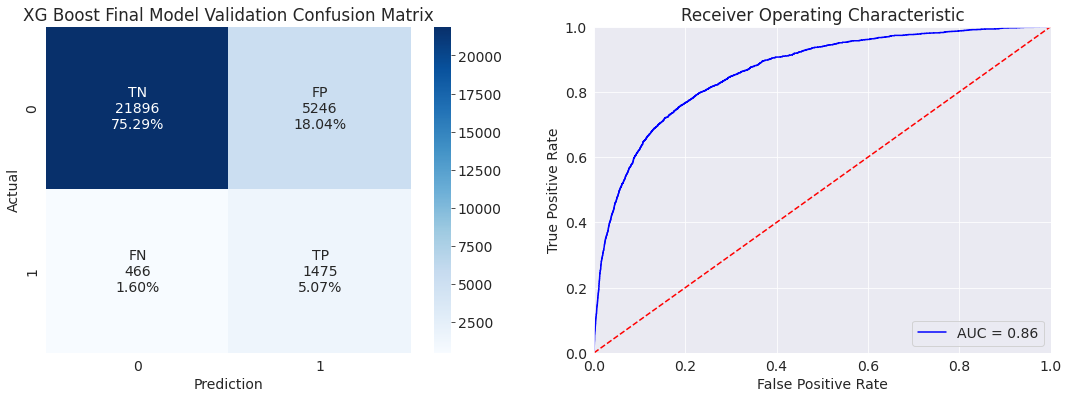

In [ ]:
make_classification_report(xgb_final_model,X_val,y_val,"XG Boost Final Model",record=True)

- The AUCROC of the XGBoost model with best Hyperparameters from Grid Search CV is slightly better than Randomisewd search CV's best params with a slight increase in Recall and F1-score.

In [ ]:
xgb_feature_importance = xgb_final_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_feature_importance
}).sort_values('Importance', ascending=False)
xgb_feature_importance_df

,Feature,Importance
6,NumberOfTimes90DaysLate,0.244448
0,RevolvingUtilizationOfUnsecuredLines,0.234149
2,NumberOfTime30-59DaysPastDueNotWorse,0.214427
8,NumberOfTime60-89DaysPastDueNotWorse,0.158797
7,NumberRealEstateLoansOrLines,0.031682
1,age,0.028876
5,NumberOfOpenCreditLinesAndLoans,0.023756
3,DebtRatio,0.015759
11,MonthlyIncomePerPerson,0.014525
4,MonthlyIncome,0.013567


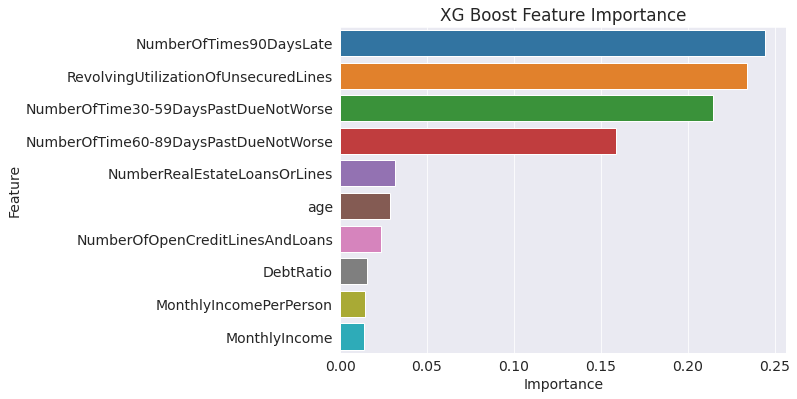

In [ ]:
plt.title('XG Boost Feature Importance')
sns.barplot(data=xgb_feature_importance_df.head(10), x='Importance', y='Feature');

-  NumberOfTimes90DaysLate and RevolvingUtilizationOfUnsecuredLines is highly effecting the model performance followed by historical Late payment features.

### Submitting the XGboost best model 

In [ ]:
make_submission_file(xgb_final_model,"xgbm_best")

'xgbm_best.csv is created.'

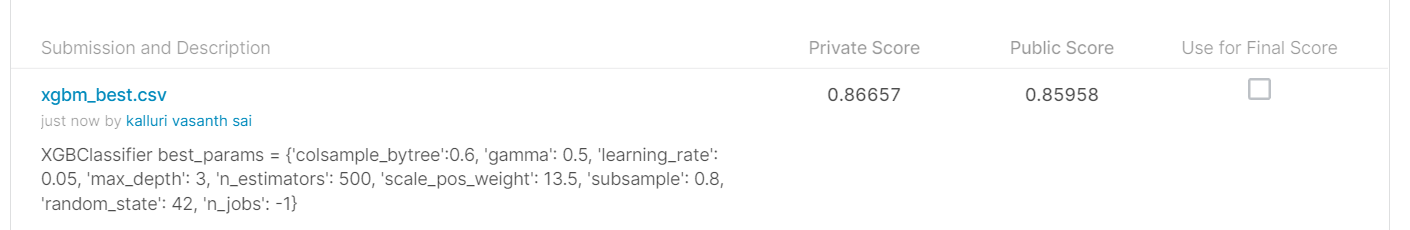

- Submitting test output to kaggle, the XGBoost AUCROC for the test results were 0.86657 On the private leaderboard, this is similar to the LGBM best model. But the LGBM classifier outperformed the XGBoost Classifier on the test set.

#### Submitting Base Models

- LogisticRegression

In [ ]:
make_submission_file(lr_model,"logistic_regression")

'logistic_regression.csv is created.'

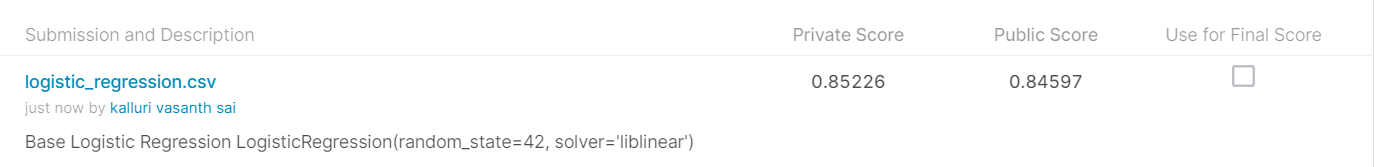

- SGDClassifier

In [ ]:
make_submission_file(sgd_model,"sgd_classifier")

'sgd_classifier.csv is created.'

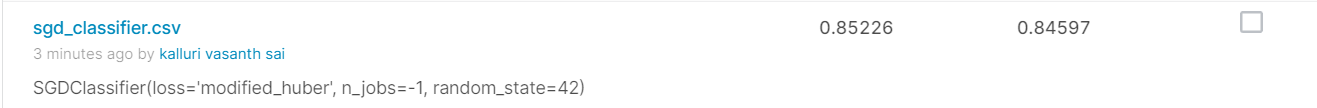

- KNN

In [ ]:
make_submission_file(KNN_model,"KNN")

'KNN.csv is created.'

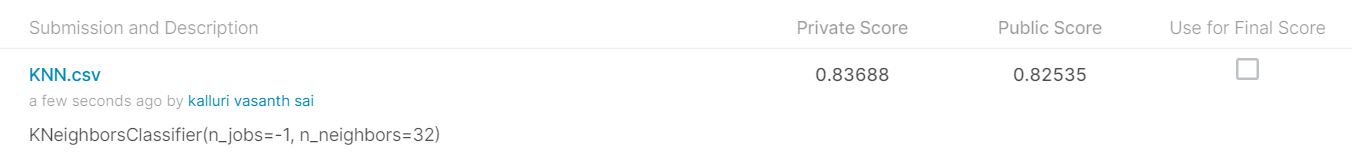

- Gaussian Naive Bayes

In [ ]:
make_submission_file(gnb_model,"GaussianNB")

'GaussianNB.csv is created.'

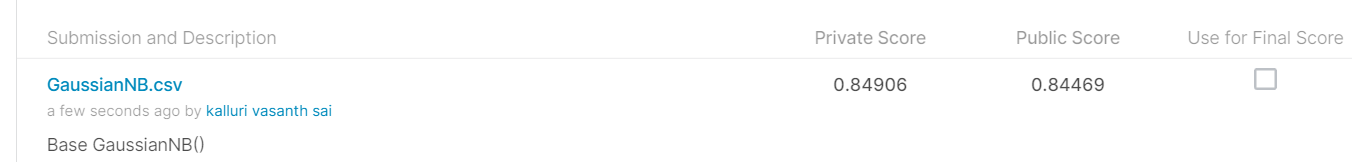

- Random Forest Classifier

In [ ]:
make_submission_file(rf_model,"random_forest")

'random_forest.csv is created.'

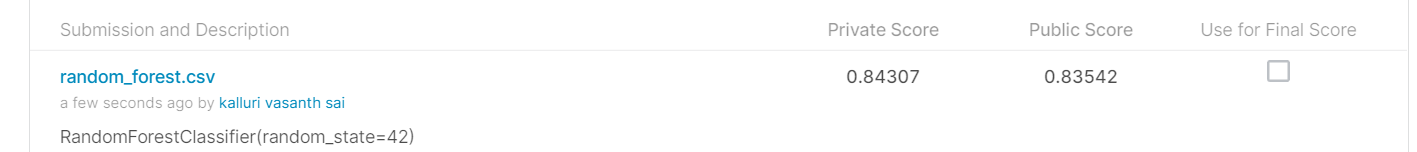

## Models Evaluation

In [ ]:
### Formatting the Final Scores dataframe to have only the validation set 
score_df = pd.DataFrame(scores)
final_scores = (score_df[score_df["Type"] == "Validation Set"].reset_index(drop=True))
final_scores.drop(["Type"],axis=1,inplace=True)

### Adding the Scores form Kaggle for test set
final_scores["Competition Private Score"] = [0.86672,0,0.86657,0.85226,0.84906,0,0.83688,0.85226,0,0.84307]
final_scores["Competition Public Score"] = [0.86046,0,0.85958,0.84597,0.84906,0,0.82535,0.84597,0,0.83542]
final_scores = final_scores[(final_scores["Competition Private Score"] != 0)].reset_index(drop=True)
final_scores.loc[(final_scores["Model"] == "XG Boost Final Model Validation"),["Model"]] = "XG Boost Final Model"


### Saving the Scores
final_scores.to_csv("/content/drive/MyDrive/data/final_scores.csv")

In [ ]:
### Veiwing the Final Scores
cm = sns.light_palette("lightblue", as_cmap=True)
final_scores.style.background_gradient(cmap=cm).set_precision(4)

,Model,ROCAUC,Accuracy,Precision,Recall,F1_Score,Competition Private Score,Competition Public Score
0,LGBM Final Model,86.3247,79.7610,21.4420,76.3010,33.4760,0.8667,0.8605
1,XG Boost Final Model,86.4370,80.3600,21.9460,75.9920,34.0570,0.8666,0.8596
2,LogisticRegression,85.0554,93.5700,55.7540,17.7230,26.8960,0.8523,0.8460
3,GaussianNB,84.7506,90.3590,33.8930,46.7800,39.3070,0.8491,0.8491
4,KNeighborsClassifier,82.7503,93.5390,56.2250,14.4260,22.9600,0.8369,0.8254
5,SGDClassifier,84.2914,93.4190,51.7290,20.8140,29.6840,0.8523,0.8460
6,RandomForestClassifier,83.8682,93.5120,54.0790,18.4440,27.5070,0.8431,0.8354


- The Hyperparameter Tuned LGBM and XG Boost have best AUCROC scores with higher Recall and F1_score. 

## Conclusion: 

<p style="text-indent:80px"> The goal of the project is to build a credit default prediction model. I have performed data analysis, data preprocessing, and data modelling with multiple machine learning models to achieve this. I have also extensively tuned the hyperparameters of XG Boost and Light Boost Models to achieve higher recall and F1-Score. The model was evaluated on AUCROC in the Kaggle competition and the LGBM model with best tuned Hyperparameters achieved a Private Score of 0.86672, which puts this model at (132/924), i.e. the <strong>top 14%.</strong><p>  

This project has been a great exercise for me to understand the concepts of machine learning. There are so many limitations with this model as the model is built only on the features that are provided in the dataset, In real life there will be more factors which affect the creditworthiness of an individual. Also, the Data considered is constant which changes rapidly in real life. 

There is always an improvement when it comes to Machine Learning models. Thus, with limited resources and time I have developed a reasonable model. With more research and more time, the performance of the model can be improved. 



## References

[1], Kaggle competition, 2011. Give Me Some Credit https://www.kaggle.com/c/GiveMeSomeCredit/   
<br>
[2], JAMES CHEN, 2022. Credit Default basics https://www.investopedia.com/terms/d/default2.asp
<br>
[3], CHRISTINA MAJASKI, 2022. Delinquency basics https://www.investopedia.com/terms/d/delinquent.asp
<br>
[4], STEVE-LEE , 2020. Classification Metrics https://www.kaggle.com/code/leeyj0511/model-evaluation-1-classification-metrics  
<br>
[5], DURGANCE GAUR, 2022. A Guide to any Classification Problem https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem
<br>
[6], Dennis T, 2019. Confusion Matrix Visualization https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 
<br>
[7], SIMON POSADA FISHMAN, 2018. Kaggle Notebook https://www.kaggle.com/code/simonpfish/comp-stats-group-data-project-final
<br>
[8], DEVELOPERS.GOOGLE,2022. ML INTRO https://developers.google.com/machine-learning/crash-course/ml-intro
<br>
[9], NICHOLAS, 2020. Kaggle Notebook https://www.kaggle.com/code/nicholasgah/eda-credit-scoring-top-100-on-leaderboard
<br>
[10],Max Fitzpatrick,2017. Binning https://github.com/max-fitzpatrick/Credit-scoring-model/blob/master/CREDIT_SCORING_NOTEBOOK.ipynb
<br>
[11],BILL PUNG, 2022. Kaggle Notebook https://www.kaggle.com/code/billptw/give-me-some-credit-fp 
<br>
[12],A & A Dukaan Financial Services Pvt. Ltd., 2022. Surviving A Credit Card Default https://blog.bankbazaar.com/surviving-a-credit-card-default/
<br>
[13],JASON BROWNLEE,2022. Tour of Evaluation Metrics for Imbalanced Classification https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/
<br>
[14],Analytics Vidhya,2022.Data Science Blogathon 24th Edition https://www.analyticsvidhya.com/blog/2022/09/data-science-blogathon-24th-edition/
<br>
[15],IBM.com, 2022. ML Models https://www.ibm.com/in-en
<br>
[16],Scikit Learn, 2022. Scikit Learn Documentation https://scikit-learn.org/stable/about.html#citing-scikit-learn
<br>
[17],Geeksforgeeks, 2022. Mchine Learning https://www.geeksforgeeks.org/machine-learning/?ref=ghm
<br>
[18],Rohith Gandhi,2018. Naive Bayes Classifier https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c
<br>
[19],Wikipedia,2022. Gaussian Function https://en.wikipedia.org/wiki/Gaussian_function
<br>
[20],ML CHEATSHEET, 2017. Classification Algorithms https://ml-cheatsheet.readthedocs.io/en/latest/classification_algos.html
<br>
[21],LaetitiaVanCauwenberge, 2016. k-nearest neighbor algorithm using Python https://www.datasciencecentral.com/k-nearest-neighbor-algorithm-using-python/
<br>
[22],saedsayad, 2015. K Nearest Neighbors - Classification https://www.saedsayad.com/k_nearest_neighbors.htm
<br>
[23],Ajitesh Kumar, 2022. K-Nearest Neighbors (KNN) Python Examples https://vitalflux.com/k-nearest-neighbors-explained-with-python-examples/
<br>
[24],xgboost developers,2021. XGBOOST Documentation https://xgboost.readthedocs.io/en/stable/
<br>
[25],Microsoft Corporation, 2022. LightGBM’s documentation https://lightgbm.readthedocs.io/en/latest/index.html 
<br>
[26],Wikipedia, 2022. Oversampling and Under sampling https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis
<br>
[27],ALEKSEY BILOGUR,2018. Undersampling and oversampling imbalanced data https://www.kaggle.com/code/residentmario/undersampling-and-oversampling-imbalanced-data/notebook
<br>
[28],Jovian.AI,2022. Data Science and Machine Learning Bootcamp https://jovian.ai/learn/zero-to-data-analyst-bootcamp
<br>